In [1]:
import pandas as pd

# data = 원본데이터
# df = 값 데이터
# pd_name = 제품종류

data = pd.read_csv('C:\\py\\data\\susample.csv', encoding = 'euc-kr')
# data = pd.read_csv('D:\\ktl\\susample.csv', encoding = 'euc-kr')

df = data.drop(['CoilNO','제품종류'], axis=1)

pd_name = data[['제품종류']]

In [2]:
# onehot 진행 후 값 데이터와 concat

pd_name = pd.get_dummies(pd_name) # ont-hot

df_all = pd.concat([pd_name, df],axis=1) # concat

df_all

,제품종류_Product_1,제품종류_Product_10,제품종류_Product_11,제품종류_Product_12,제품종류_Product_13,제품종류_Product_14,제품종류_Product_15,제품종류_Product_16,제품종류_Product_17,제품종류_Product_18,...,Middle.Cooling Zone#4(4WB)유량,Middle.Cooling Zone#4(4WB)압력,Last.Cooling Zone#1(1WB)유량,Last.Cooling Zone#1(1WB)압력,Last.Cooling Zone#2(2WB)유량,Last.Cooling Zone#2(2WB)압력,Rolling Time,Idle Time,압연 Pitch,선재사상압연모터전류
0,0,0,0,0,0,0,0,0,1,0,...,410.9,1.0,584.2,1.0,593.2,1.6,67,7,74,704.610300
1,0,0,0,0,0,0,0,0,1,0,...,401.8,1.0,581.2,1.0,584.7,1.6,67,7,74,709.257700
2,0,0,0,0,0,0,0,0,1,0,...,395.2,0.9,581.7,1.0,582.2,1.6,67,8,75,725.786700
3,0,0,0,0,0,0,0,0,1,0,...,400.6,1.0,580.4,1.0,583.4,1.6,67,11,78,717.851033
4,0,0,0,0,0,0,0,0,1,0,...,348.9,0.7,580.6,1.0,581.8,1.6,67,8,75,699.787467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100464,0,0,0,0,0,0,0,0,0,0,...,53.3,0.0,61.4,0.0,53.2,0.0,45,300,345,468.775600
100465,0,0,0,0,0,0,0,0,0,0,...,53.5,0.0,68.8,0.0,56.2,0.0,44,300,344,469.696400
100466,0,0,0,0,0,0,0,0,0,0,...,53.0,0.0,65.1,0.0,54.4,0.0,44,300,344,470.485533
100467,0,0,0,0,0,0,0,0,0,0,...,53.0,0.0,64.2,0.0,52.6,0.0,41,300,341,470.617100


In [3]:
# 원핫과 값데이터를 7:3으로 split

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_all, test_size = 0.3) # train 7 : test 3 split

print(train_set.shape)
print(test_set.shape)

(70328, 87)
(30141, 87)


In [4]:
# minmax 진행
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_set = scaler.fit_transform(train_set) # train minmax
train_set=pd.DataFrame(train_set)

test_set = scaler.fit_transform(test_set) # test minmax
test_set=pd.DataFrame(test_set)

In [5]:
# 컬럼명 입렵
train_set.columns = df_all.columns.tolist()
test_set.columns = df_all.columns.tolist()

----------

# KMeans

In [6]:
# Kmeans 군집 3 설정

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) # 군집을 3개로
kmeans.fit(train_set)

train_kmeans = kmeans.predict(train_set)
test_kmeans = kmeans.predict(test_set)

In [7]:
# data확인

print(train_kmeans.shape)
print(train_kmeans)
print(test_kmeans.shape)
print(test_kmeans)

(70328,)
[0 1 0 ... 1 2 2]
(30141,)
[2 2 2 ... 1 0 2]


In [8]:
# 부여된 군집를 k 컬럼으로 추가

train_kmeans=pd.DataFrame(train_kmeans)
train_kmeans.columns=['k']
train_kmeans_set = pd.concat([train_set, train_kmeans],axis=1) # train data와 kmeans data를 concat

test_kmeans=pd.DataFrame(test_kmeans)
test_kmeans.columns=['k']
test_kmeans_set = pd.concat([test_set, test_kmeans],axis=1) # test data와 kmeans data를 concat

In [9]:
train_kmeans_set.head(3)

,제품종류_Product_1,제품종류_Product_10,제품종류_Product_11,제품종류_Product_12,제품종류_Product_13,제품종류_Product_14,제품종류_Product_15,제품종류_Product_16,제품종류_Product_17,제품종류_Product_18,...,Middle.Cooling Zone#4(4WB)압력,Last.Cooling Zone#1(1WB)유량,Last.Cooling Zone#1(1WB)압력,Last.Cooling Zone#2(2WB)유량,Last.Cooling Zone#2(2WB)압력,Rolling Time,Idle Time,압연 Pitch,선재사상압연모터전류,k
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.189189,0.244134,0.186047,0.295531,0.155556,0.475610,0.023333,0.202864,0.615134,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.054054,0.546184,0.534884,0.669151,0.644444,0.286585,0.026667,0.131265,0.416805,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.135135,0.199981,0.209302,0.259929,0.222222,0.640244,0.030000,0.272076,0.705485,0


In [10]:
test_kmeans_set.head(3)

,제품종류_Product_1,제품종류_Product_10,제품종류_Product_11,제품종류_Product_12,제품종류_Product_13,제품종류_Product_14,제품종류_Product_15,제품종류_Product_16,제품종류_Product_17,제품종류_Product_18,...,Middle.Cooling Zone#4(4WB)압력,Last.Cooling Zone#1(1WB)유량,Last.Cooling Zone#1(1WB)압력,Last.Cooling Zone#2(2WB)유량,Last.Cooling Zone#2(2WB)압력,Rolling Time,Idle Time,압연 Pitch,선재사상압연모터전류,k
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.027027,0.500563,0.441860,0.666806,0.409091,0.391667,0.030000,0.133333,0.345367,2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027027,0.537345,0.534884,0.773920,0.750000,0.391667,0.023333,0.128571,0.396077,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.243243,0.471858,0.488372,0.620613,0.613636,0.466667,0.020000,0.147619,0.555440,2


--------------

# Autoencoder

In [11]:
col_name = train_kmeans_set.columns.tolist()

In [12]:
# k1_train = 컬럼 k가 0인 data (encoded input)
# k1_train_data = .values를 실행한 값

##### train data #####

k1_train = train_kmeans_set['k'] == 0
k1_train_data = train_kmeans_set[k1_train]
k1_train_data = k1_train_data.values

k2_train = train_kmeans_set['k'] == 1
k2_train_data = train_kmeans_set[k2_train]
k2_train_data = k2_train_data.values

k3_train = train_kmeans_set['k'] == 2
k3_train_data = train_kmeans_set[k3_train]
k3_train_data = k3_train_data.values

##### test data #####

k1_test = test_kmeans_set['k'] == 0
k1_test_data = test_kmeans_set[k1_test]
k1_test_data = k1_test_data.values

k2_test = test_kmeans_set['k'] == 1
k2_test_data = test_kmeans_set[k2_test]
k2_test_data = k2_test_data.values

k3_test = test_kmeans_set['k'] == 2
k3_test_data = test_kmeans_set[k3_test]
k3_test_data = k3_test_data.values

In [13]:
print(k1_train_data.shape)
print(k2_train_data.shape)
print(k3_train_data.shape)
print(k1_test_data.shape)
print(k2_test_data.shape)
print(k3_test_data.shape)

(19315, 88)
(30758, 88)
(20255, 88)
(8229, 88)
(13152, 88)
(8760, 88)


In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import elu
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

In [15]:
# 각 층의 사이즈 선택
# I choose the size of each layer

n_input_layer = 88
n_hidden1 = 60
n_hidden2 = 40
n_hidden3 = 20
n_encoding_layer = 10
n_hidden5 = 20
n_hidden6 = 40
n_hidden7 = 60
n_output_layer = n_input_layer  # size of output layer = size of input layer, of course

############################### Autoencoder 1 ###############################

Autoencoder1 = tf.keras.models.Sequential([
    # ENCODER
    Dense(n_input_layer, input_shape = (n_input_layer,), activation = elu),   # Input layer    
    Dense(n_hidden1, activation = elu), # hidden layer 1    
    Dense(n_hidden2, activation = elu), # hidden layer 2    
    Dense(n_hidden3, activation = elu), # hidden layer 3
    
    # CENTRAL LAYER
    Dense(n_encoding_layer, activation = elu, name = 'central_layer'), 
    
    # DECODER
    Dense(n_hidden5, activation = elu), # hidden layer 5
    Dense(n_hidden6, activation = elu), # hidden layer 6
    Dense(n_hidden7, activation = elu), # hidden layer 7
    Dense(n_output_layer, activation = elu)  # Output layer
])

############################### Autoencoder 2 ###############################

Autoencoder2 = tf.keras.models.Sequential([
    # ENCODER
    Dense(n_input_layer, input_shape = (n_input_layer,), activation = elu),   # Input layer    
    Dense(n_hidden1, activation = elu), # hidden layer 1    
    Dense(n_hidden2, activation = elu), # hidden layer 2    
    Dense(n_hidden3, activation = elu), # hidden layer 3
    
    # CENTRAL LAYER
    Dense(n_encoding_layer, activation = elu, name = 'central_layer'), 
    
    # DECODER
    Dense(n_hidden5, activation = elu), # hidden layer 5
    Dense(n_hidden6, activation = elu), # hidden layer 6
    Dense(n_hidden7, activation = elu), # hidden layer 7
    Dense(n_output_layer, activation = elu)  # Output layer
])

############################### Autoencoder 3 ###############################

Autoencoder3 = tf.keras.models.Sequential([
    # ENCODER
    Dense(n_input_layer, input_shape = (n_input_layer,), activation = elu),   # Input layer    
    Dense(n_hidden1, activation = elu), # hidden layer 1    
    Dense(n_hidden2, activation = elu), # hidden layer 2    
    Dense(n_hidden3, activation = elu), # hidden layer 3
    
    # CENTRAL LAYER
    Dense(n_encoding_layer, activation = elu, name = 'central_layer'), 
    
    # DECODER
    Dense(n_hidden5, activation = elu), # hidden layer 5
    Dense(n_hidden6, activation = elu), # hidden layer 6
    Dense(n_hidden7, activation = elu), # hidden layer 7
    Dense(n_output_layer, activation = elu)  # Output layer
])

In [16]:
### 훈련 횟수 ###
n_epochs = 1000

In [17]:
# 1번 훈련

# 손실 : 평균제곱오차
# Loss: mean squared error
loss1 = tf.keras.losses.MeanSquaredError()

# Adam Optimizer
optimizer1 = tf.optimizers.Adam(learning_rate = 0.0005)

# 손실 개선 저장
# save loss improvement
loss_history1 = []  

for epoch in range(n_epochs):
    
    with tf.GradientTape() as tape:
        current_loss1 = loss1(Autoencoder1(k1_train_data), k1_train_data)
    
    # 손실 함수의 기울기를 얻습니다.
    # get the gradient of the loss function
    gradients1 = tape.gradient(current_loss1, Autoencoder1.trainable_variables)
    # 가중치 업데이트
    # update the weights
    optimizer1.apply_gradients(zip(gradients1, Autoencoder1.trainable_variables))  
    
    loss_history1.append(current_loss1.numpy())  # save current loss in its history
    
    # show loss improvement every 200 epochs
    if (epoch+1) % 200 == 0:
        print(str(epoch+1) + '\tLoss : ' + str(current_loss1.numpy()))
#
print('\nEncoding complete')

200	Loss : 0.010640331543982029
400	Loss : 0.006467651110142469
600	Loss : 0.00531855970621109
800	Loss : 0.004740151111036539
1000	Loss : 0.004280843771994114

Encoding complete


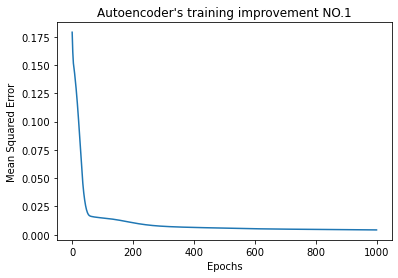

In [18]:
# 1번
plt.plot(loss_history1)
plt.title("Autoencoder's training improvement NO.1")
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [19]:
#2번 훈련

# 손실 : 평균제곱오차
# Loss: mean squared error
loss2 = tf.keras.losses.MeanSquaredError()

# Adam Optimizer
optimizer2 = tf.optimizers.Adam(learning_rate = 0.0005)

# 손실 개선 저장
# save loss improvement
loss_history2 = []  

for epoch in range(n_epochs):
    
    with tf.GradientTape() as tape:
        current_loss2 = loss2(Autoencoder2(k2_train_data), k2_train_data)
    
    # 손실 함수의 기울기를 얻습니다.
    # get the gradient of the loss function
    gradients2 = tape.gradient(current_loss2, Autoencoder2.trainable_variables)
    # 가중치 업데이트
    # update the weights
    optimizer2.apply_gradients(zip(gradients2, Autoencoder2.trainable_variables))  
    
    loss_history2.append(current_loss2.numpy())  # save current loss in its history
    
    
    if (epoch+1) % 200 == 0:
        print(str(epoch+1) + '\tLoss : ' + str(current_loss2.numpy()))
#
print('\nEncoding complete')

200	Loss : 0.016175827011466026
400	Loss : 0.011560095474123955
600	Loss : 0.009246064350008965
800	Loss : 0.008520057424902916
1000	Loss : 0.007711200043559074

Encoding complete


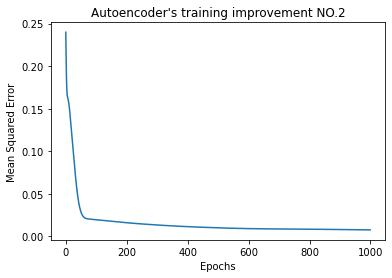

In [20]:
# 2번
plt.plot(loss_history2)
plt.title("Autoencoder's training improvement NO.2")
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [21]:
# 3번 훈련

# 손실 : 평균제곱오차
# Loss: mean squared error
loss3 = tf.keras.losses.MeanSquaredError()

# Adam Optimizer
optimizer3 = tf.optimizers.Adam(learning_rate = 0.0005)

# 손실 개선 저장
# save loss improvement
loss_history3 = []  

for epoch in range(n_epochs):
    
    with tf.GradientTape() as tape:
        current_loss3 = loss3(Autoencoder3(k3_train_data), k3_train_data)
    
    # 손실 함수의 기울기를 얻습니다.
    # get the gradient of the loss function
    gradients3 = tape.gradient(current_loss3, Autoencoder3.trainable_variables)
    # 가중치 업데이트
    # update the weights
    optimizer3.apply_gradients(zip(gradients3, Autoencoder3.trainable_variables))  
    
    loss_history3.append(current_loss3.numpy())  # save current loss in its history
    
    # show loss improvement every 200 epochs
    if (epoch+1) % 200 == 0:
        print(str(epoch+1) + '\tLoss : ' + str(current_loss3.numpy()))
#
print('\nEncoding complete')

200	Loss : 0.017884710803627968
400	Loss : 0.013856261037290096
600	Loss : 0.010785771533846855
800	Loss : 0.009321090765297413
1000	Loss : 0.008238505572080612

Encoding complete


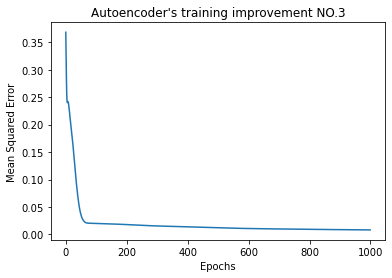

In [22]:
# 3번
plt.plot(loss_history3)
plt.title("Autoencoder's training improvement NO.3")
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

----------

# decode ouput / 시각화

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

%matplotlib inline

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 1번 오토인코더

In [24]:
#################### Autoencoder NO.1 encoded output ##########################

extract_encoded_data1 = K.function(inputs = Autoencoder1.layers[0].input, 
                                  outputs = Autoencoder1.layers[8].output) # out put 레이어

# extract encoded dataframe
decoded1 = extract_encoded_data1(k1_test_data)

decoded1_df = pd.DataFrame(decoded1)
decoded1_df.columns = col_name

k1_test_data_df = pd.DataFrame(k1_test_data)
k1_test_data_df.columns = col_name

# 제품종류와 KMeans 컬럼 제외
view1_in  = k1_test_data_df.iloc[:, 48:87]# E-IN
view1_out = decoded1_df.iloc[:, 48:87] # D-OUT

<AxesSubplot:xlabel='선재사상압연출측소재온도', ylabel='Density'>

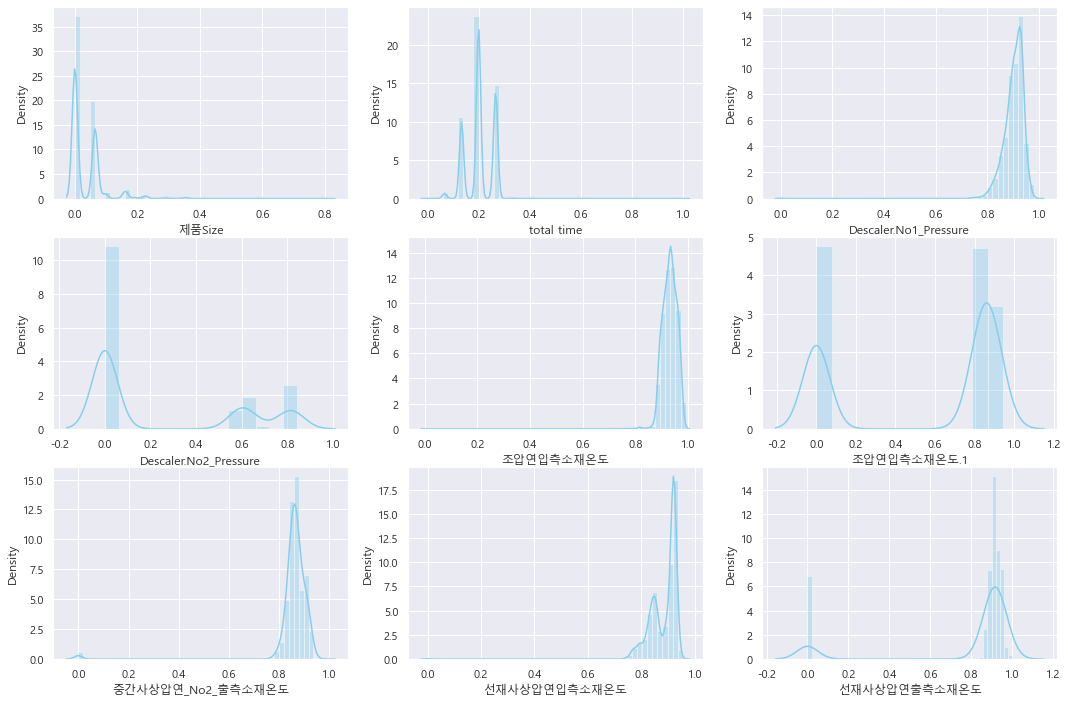

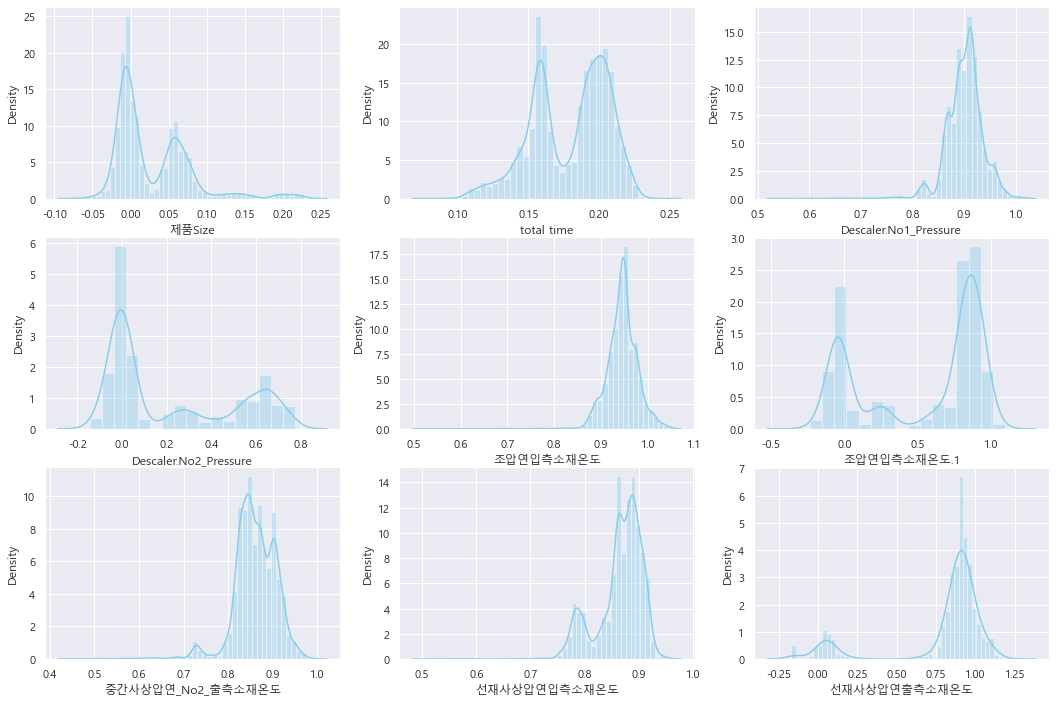

In [25]:
# E-IN

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view1_in['제품Size'], color = 'skyblue', ax= ax1) 
sns.distplot(view1_in['total time'], color = 'skyblue', ax= ax2) 
sns.distplot(view1_in['Descaler.No1_Pressure'], color = 'skyblue', ax= ax3) 
sns.distplot(view1_in['Descaler.No2_Pressure'], color = 'skyblue', ax=ax4)
sns.distplot(view1_in['조압연입측소재온도'], color = 'skyblue', ax=ax5) 
sns.distplot(view1_in['조압연입측소재온도.1'], color = 'skyblue', ax=ax6) 
sns.distplot(view1_in['중간사상압연_No2_출측소재온도'], color = 'skyblue', ax=ax7) 
sns.distplot(view1_in['선재사상압연입측소재온도'], color = 'skyblue', ax=ax8) 
sns.distplot(view1_in['선재사상압연출측소재온도'], color = 'skyblue', ax=ax9) 

# D-OUT

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view1_out['제품Size'], color = 'skyblue', ax= ax1) 
sns.distplot(view1_out['total time'], color = 'skyblue', ax= ax2) 
sns.distplot(view1_out['Descaler.No1_Pressure'], color = 'skyblue', ax= ax3) 
sns.distplot(view1_out['Descaler.No2_Pressure'], color = 'skyblue', ax=ax4)
sns.distplot(view1_out['조압연입측소재온도'], color = 'skyblue', ax=ax5) 
sns.distplot(view1_out['조압연입측소재온도.1'], color = 'skyblue', ax=ax6) 
sns.distplot(view1_out['중간사상압연_No2_출측소재온도'], color = 'skyblue', ax=ax7) 
sns.distplot(view1_out['선재사상압연입측소재온도'], color = 'skyblue', ax=ax8) 
sns.distplot(view1_out['선재사상압연출측소재온도'], color = 'skyblue', ax=ax9) 

<AxesSubplot:xlabel='최종압연 출측속도', ylabel='Density'>

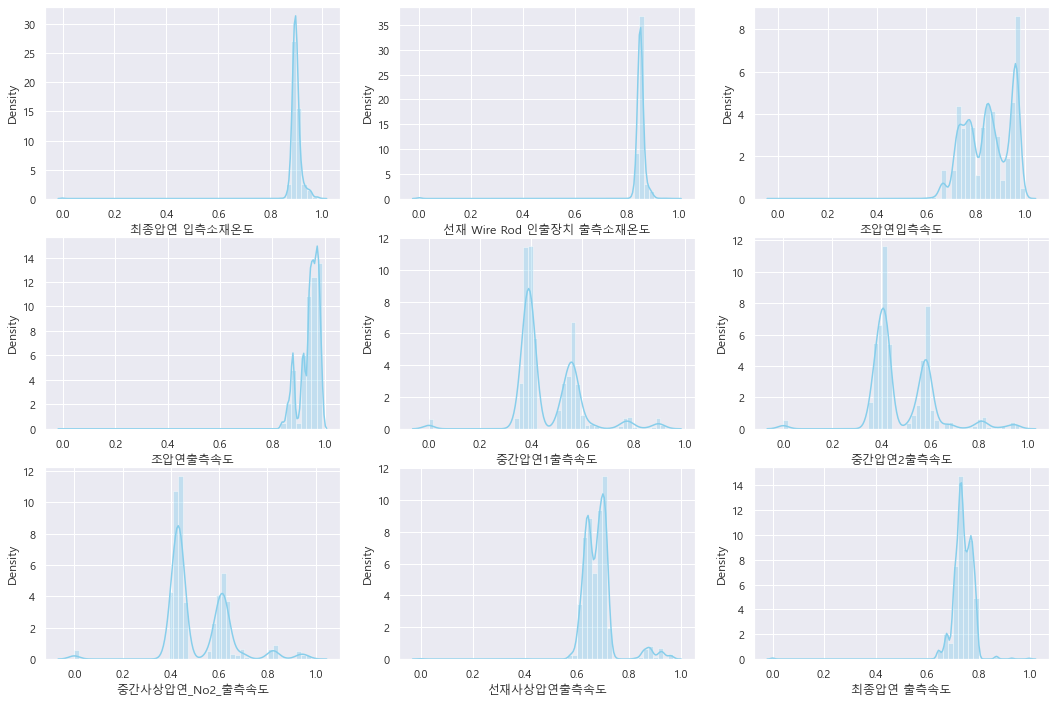

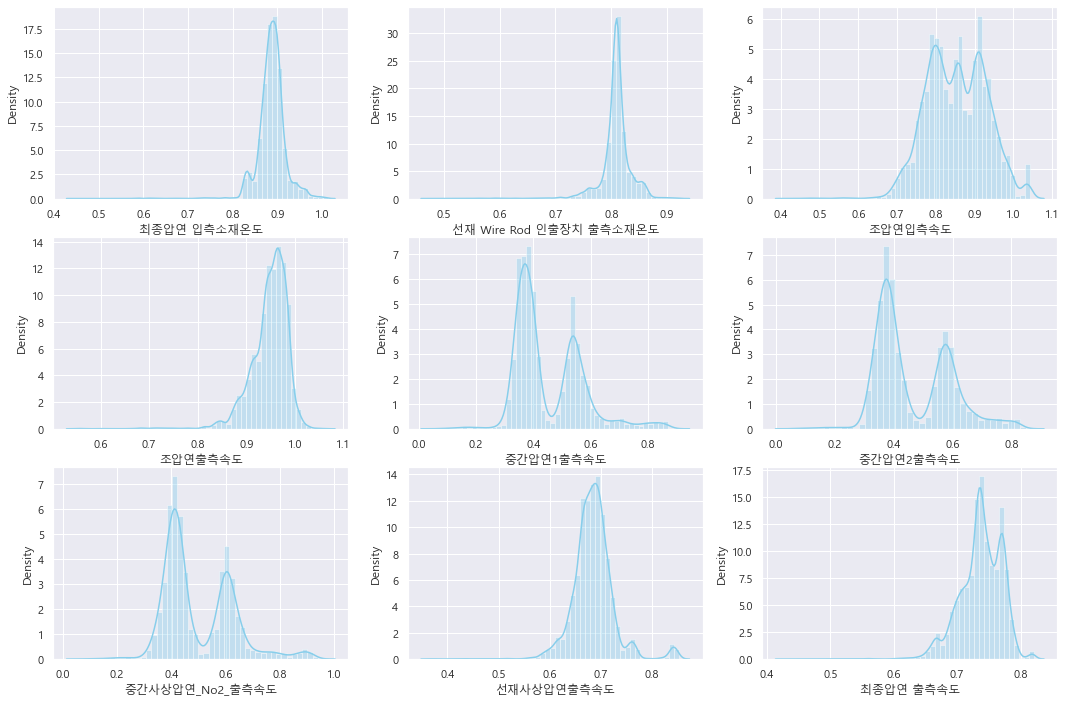

In [26]:
# E-IN

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view1_in['최종압연 입측소재온도'], color = 'skyblue', ax=ax1)
sns.distplot(view1_in['선재 Wire Rod 인출장치 출측소재온도'], color = 'skyblue', ax=ax2)
sns.distplot(view1_in['조압연입측속도'], color = 'skyblue', ax=ax3)
sns.distplot(view1_in['조압연출측속도'], color = 'skyblue', ax=ax4)
sns.distplot(view1_in['중간압연1출측속도'], color = 'skyblue', ax=ax5)
sns.distplot(view1_in['중간압연2출측속도'], color = 'skyblue', ax=ax6)
sns.distplot(view1_in['중간사상압연_No2_출측속도'], color = 'skyblue', ax=ax7)
sns.distplot(view1_in['선재사상압연출측속도'], color = 'skyblue', ax=ax8)
sns.distplot(view1_in['최종압연 출측속도'], color = 'skyblue', ax=ax9)

# D-OUT

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view1_out['최종압연 입측소재온도'], color = 'skyblue', ax=ax1)
sns.distplot(view1_out['선재 Wire Rod 인출장치 출측소재온도'], color = 'skyblue', ax=ax2)
sns.distplot(view1_out['조압연입측속도'], color = 'skyblue', ax=ax3)
sns.distplot(view1_out['조압연출측속도'], color = 'skyblue', ax=ax4)
sns.distplot(view1_out['중간압연1출측속도'], color = 'skyblue', ax=ax5)
sns.distplot(view1_out['중간압연2출측속도'], color = 'skyblue', ax=ax6)
sns.distplot(view1_out['중간사상압연_No2_출측속도'], color = 'skyblue', ax=ax7)
sns.distplot(view1_out['선재사상압연출측속도'], color = 'skyblue', ax=ax8)
sns.distplot(view1_out['최종압연 출측속도'], color = 'skyblue', ax=ax9)

<AxesSubplot:xlabel='Middle.Cooling Zone#2(2WB)압력', ylabel='Density'>

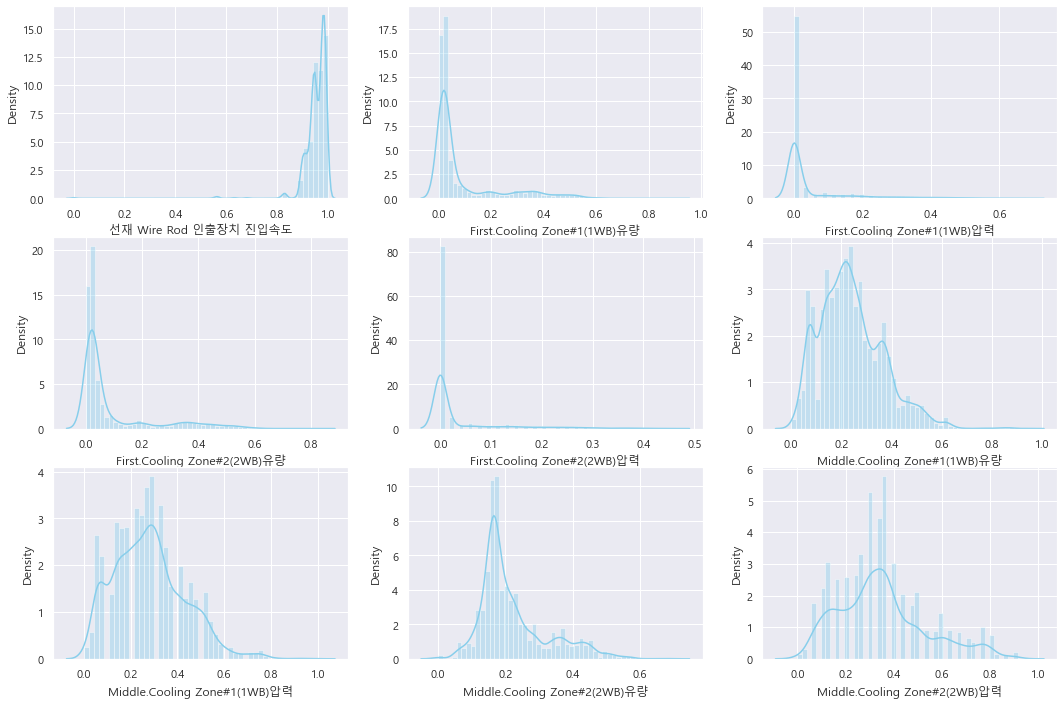

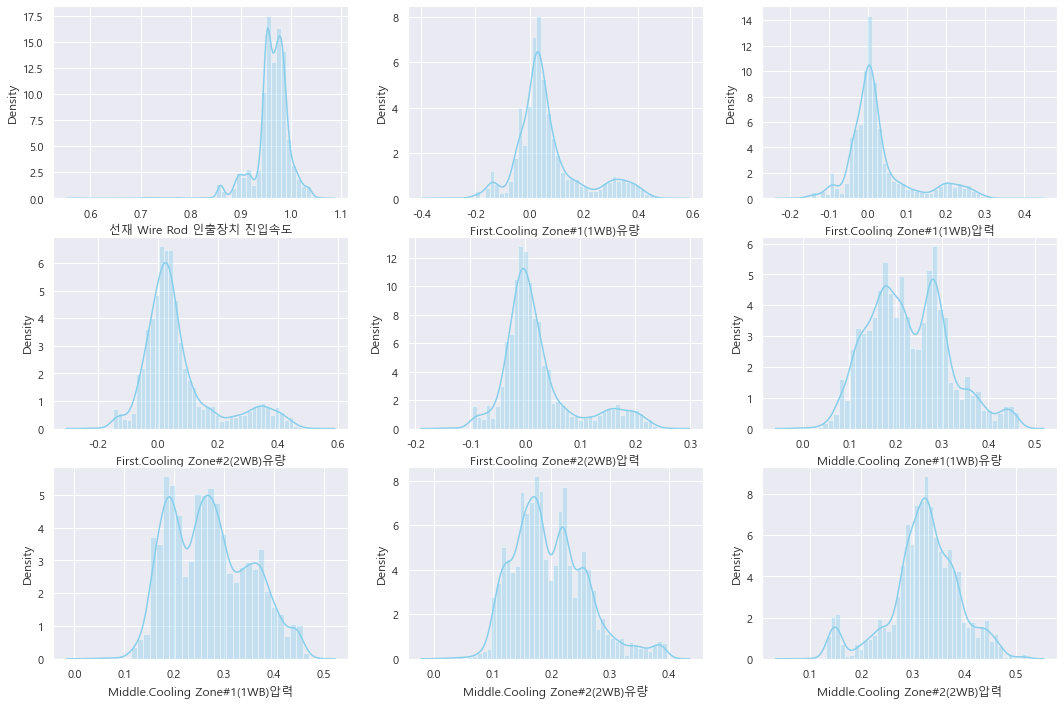

In [27]:
# E-IN

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view1_in['선재 Wire Rod 인출장치 진입속도'], color = 'skyblue', ax=ax1)
sns.distplot(view1_in['First.Cooling Zone#1(1WB)유량'], color = 'skyblue', ax=ax2)
sns.distplot(view1_in['First.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax3)
sns.distplot(view1_in['First.Cooling Zone#2(2WB)유량'], color = 'skyblue', ax=ax4)
sns.distplot(view1_in['First.Cooling Zone#2(2WB)압력'], color = 'skyblue', ax=ax5)
sns.distplot(view1_in['Middle.Cooling Zone#1(1WB)유량'], color = 'skyblue', ax=ax6)
sns.distplot(view1_in['Middle.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax7)
sns.distplot(view1_in['Middle.Cooling Zone#2(2WB)유량'], color = 'skyblue', ax=ax8)
sns.distplot(view1_in['Middle.Cooling Zone#2(2WB)압력'], color = 'skyblue', ax=ax9)

# D-OUT

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view1_out['선재 Wire Rod 인출장치 진입속도'], color = 'skyblue', ax=ax1)
sns.distplot(view1_out['First.Cooling Zone#1(1WB)유량'], color = 'skyblue', ax=ax2)
sns.distplot(view1_out['First.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax3)
sns.distplot(view1_out['First.Cooling Zone#2(2WB)유량'], color = 'skyblue', ax=ax4)
sns.distplot(view1_out['First.Cooling Zone#2(2WB)압력'], color = 'skyblue', ax=ax5)
sns.distplot(view1_out['Middle.Cooling Zone#1(1WB)유량'], color = 'skyblue', ax=ax6)
sns.distplot(view1_out['Middle.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax7)
sns.distplot(view1_out['Middle.Cooling Zone#2(2WB)유량'], color = 'skyblue', ax=ax8)
sns.distplot(view1_out['Middle.Cooling Zone#2(2WB)압력'], color = 'skyblue', ax=ax9)

<AxesSubplot:xlabel='선재사상압연모터전류', ylabel='Density'>

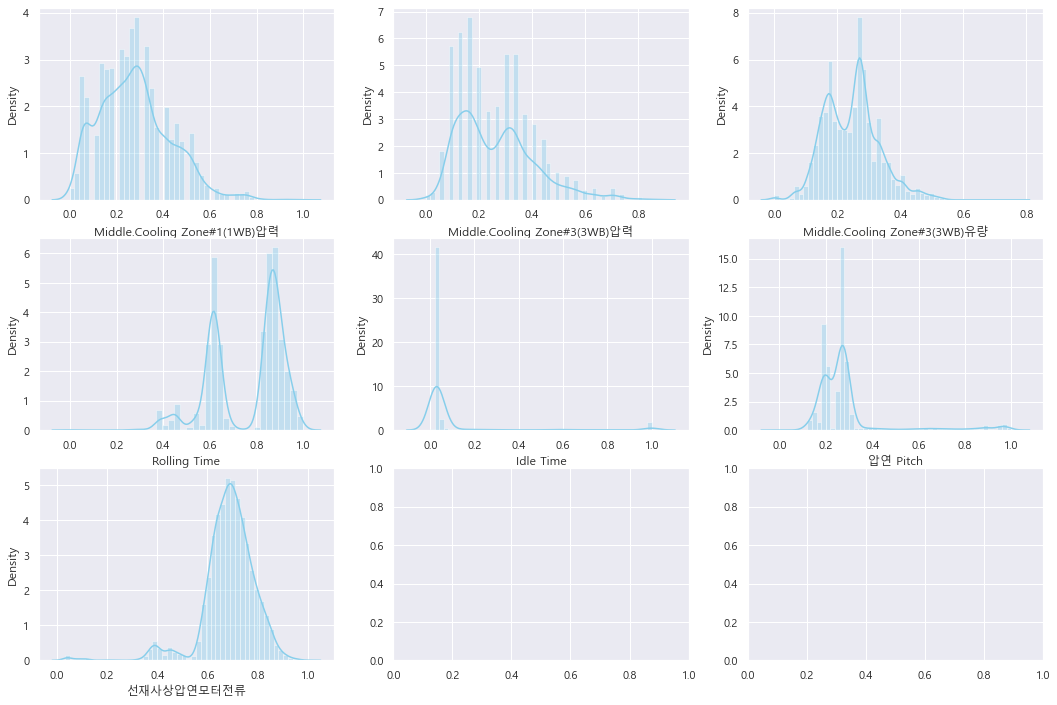

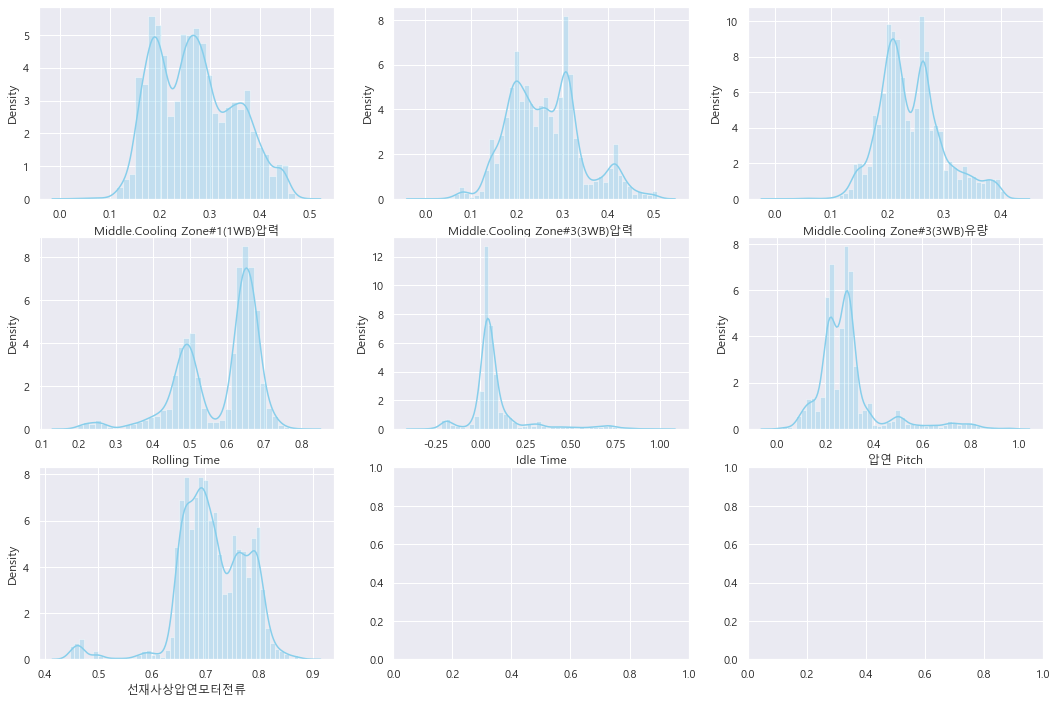

In [28]:
# E-IN

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view1_in['Middle.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax1)
sns.distplot(view1_in['Middle.Cooling Zone#3(3WB)압력'], color = 'skyblue', ax=ax2)
sns.distplot(view1_in['Middle.Cooling Zone#3(3WB)유량'], color = 'skyblue', ax=ax3)
sns.distplot(view1_in['Rolling Time'], color = 'skyblue', ax=ax4)
sns.distplot(view1_in['Idle Time'], color = 'skyblue', ax=ax5)
sns.distplot(view1_in['압연 Pitch'], color = 'skyblue', ax=ax6)
sns.distplot(view1_in['선재사상압연모터전류'], color = 'skyblue', ax=ax7)

# D-OUT

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view1_out['Middle.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax1)
sns.distplot(view1_out['Middle.Cooling Zone#3(3WB)압력'], color = 'skyblue', ax=ax2)
sns.distplot(view1_out['Middle.Cooling Zone#3(3WB)유량'], color = 'skyblue', ax=ax3)
sns.distplot(view1_out['Rolling Time'], color = 'skyblue', ax=ax4)
sns.distplot(view1_out['Idle Time'], color = 'skyblue', ax=ax5)
sns.distplot(view1_out['압연 Pitch'], color = 'skyblue', ax=ax6)
sns.distplot(view1_out['선재사상압연모터전류'], color = 'skyblue', ax=ax7)

In [29]:
k1_test_data_df # encode in put

,제품종류_Product_1,제품종류_Product_10,제품종류_Product_11,제품종류_Product_12,제품종류_Product_13,제품종류_Product_14,제품종류_Product_15,제품종류_Product_16,제품종류_Product_17,제품종류_Product_18,...,Middle.Cooling Zone#4(4WB)압력,Last.Cooling Zone#1(1WB)유량,Last.Cooling Zone#1(1WB)압력,Last.Cooling Zone#2(2WB)유량,Last.Cooling Zone#2(2WB)압력,Rolling Time,Idle Time,압연 Pitch,선재사상압연모터전류,k
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.351351,0.387192,0.186047,0.503234,0.409091,0.591667,0.670000,0.647619,0.742418,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.081081,0.166500,0.162791,0.212268,0.090909,0.958333,0.030000,0.295238,0.782137,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.189189,0.307192,0.139535,0.402629,0.181818,0.633333,0.036667,0.207143,0.677866,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.108108,0.227321,0.162791,0.297684,0.454545,0.625000,0.893333,0.816667,0.865192,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.108108,0.120869,0.093023,0.168412,0.136364,0.833333,0.023333,0.254762,0.595993,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.108108,0.250491,0.162791,0.324682,0.204545,0.591667,0.030000,0.190476,0.687883,0.0
8225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.243243,0.336798,0.372093,0.411308,0.204545,0.450000,0.023333,0.145238,0.382791,0.0
8226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.135135,0.212132,0.255814,0.276028,0.272727,0.900000,0.040000,0.285714,0.788815,0.0
8227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.243243,0.450491,0.325581,0.317171,0.295455,0.625000,0.030000,0.200000,0.666388,0.0


In [30]:
decoded1_df # decode in put

,제품종류_Product_1,제품종류_Product_10,제품종류_Product_11,제품종류_Product_12,제품종류_Product_13,제품종류_Product_14,제품종류_Product_15,제품종류_Product_16,제품종류_Product_17,제품종류_Product_18,...,Middle.Cooling Zone#4(4WB)압력,Last.Cooling Zone#1(1WB)유량,Last.Cooling Zone#1(1WB)압력,Last.Cooling Zone#2(2WB)유량,Last.Cooling Zone#2(2WB)압력,Rolling Time,Idle Time,압연 Pitch,선재사상압연모터전류,k
0,0.008227,-0.009120,-0.026087,0.003000,0.006091,-0.009655,-0.001440,-0.013955,-0.025741,-0.052829,...,0.321128,0.221813,0.248916,0.286996,0.206407,0.529651,0.496466,0.563791,0.783837,0.006578
1,0.010905,-0.010507,0.001096,0.017963,0.005373,0.001119,-0.009848,-0.001101,0.019294,-0.044527,...,0.019510,0.134430,0.252756,0.156820,0.228397,0.721792,0.321835,0.524771,0.756970,0.019362
2,0.003540,-0.001261,0.007744,-0.000861,0.004110,-0.000644,0.007094,-0.000899,0.987006,0.041436,...,0.198727,0.271319,0.232647,0.298914,0.237890,0.520228,0.046528,0.233031,0.652050,0.001897
3,0.004647,-0.008982,-0.010673,-0.003333,0.012091,-0.004113,0.000801,0.009041,0.004323,-0.114472,...,0.229145,0.181655,0.278497,0.269625,0.211523,0.539525,0.701915,0.706388,0.815976,0.012474
4,-0.009918,-0.012771,-0.001516,-0.008588,0.006207,-0.013325,-0.015256,-0.014022,-0.074653,-0.072585,...,0.089884,0.114515,0.255403,0.154244,0.267605,0.677444,-0.189384,0.147793,0.691513,0.007277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8224,0.007085,0.004104,0.015204,-0.001354,-0.000044,0.001798,0.009227,0.001727,0.964877,0.056296,...,0.186268,0.274179,0.230167,0.301263,0.241560,0.519182,0.039314,0.230278,0.641236,0.001865
8225,0.013431,0.007872,0.018977,0.004200,-0.009497,0.002820,0.000044,-0.012006,-0.088754,0.532664,...,0.244976,0.363327,0.255579,0.430551,0.260727,0.279985,-0.030353,0.121662,0.471870,0.006527
8226,0.011632,0.015517,0.018632,0.000553,-0.005548,0.014984,0.005456,-0.008470,-0.016257,-0.027140,...,0.187043,0.165513,0.215022,0.197647,0.217196,0.643979,0.068341,0.308818,0.757254,-0.006290
8227,0.007945,-0.000165,0.004114,0.000628,0.003537,0.001544,0.007920,0.005512,0.964173,0.035688,...,0.228553,0.288439,0.251740,0.322054,0.251827,0.482346,0.026630,0.200900,0.653483,0.000519


In [31]:
result1 = k1_test_data_df-decoded1_df
result1

,제품종류_Product_1,제품종류_Product_10,제품종류_Product_11,제품종류_Product_12,제품종류_Product_13,제품종류_Product_14,제품종류_Product_15,제품종류_Product_16,제품종류_Product_17,제품종류_Product_18,...,Middle.Cooling Zone#4(4WB)압력,Last.Cooling Zone#1(1WB)유량,Last.Cooling Zone#1(1WB)압력,Last.Cooling Zone#2(2WB)유량,Last.Cooling Zone#2(2WB)압력,Rolling Time,Idle Time,압연 Pitch,선재사상압연모터전류,k
0,-0.008227,0.009120,0.026087,-0.003000,-0.006091,0.009655,0.001440,0.013955,0.025741,0.052829,...,0.030224,0.165379,-0.062870,0.216238,0.202684,0.062016,0.173534,0.083828,-0.041419,-0.006578
1,-0.010905,0.010507,-0.001096,-0.017963,-0.005373,-0.001119,0.009848,0.001101,-0.019294,0.044527,...,0.061571,0.032070,-0.089965,0.055447,-0.137488,0.236541,-0.291835,-0.229533,0.025167,-0.019362
2,-0.003540,0.001261,-0.007744,0.000861,-0.004110,0.000644,-0.007094,0.000899,0.012994,-0.041436,...,-0.009537,0.035873,-0.093112,0.103715,-0.056072,0.113106,-0.009862,-0.025888,0.025816,-0.001897
3,-0.004647,0.008982,0.010673,0.003333,-0.012091,0.004113,-0.000801,-0.009041,-0.004323,0.114472,...,-0.121037,0.045666,-0.115706,0.028059,0.243023,0.085475,0.191418,0.110279,0.049216,-0.012474
4,0.009918,0.012771,0.001516,0.008588,-0.006207,0.013325,0.015256,0.014022,0.074653,0.072585,...,0.018224,0.006354,-0.162380,0.014168,-0.131241,0.155890,0.212717,0.106969,-0.095520,-0.007277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8224,-0.007085,-0.004104,-0.015204,0.001354,0.000044,-0.001798,-0.009227,-0.001727,0.035123,-0.056296,...,-0.078160,-0.023688,-0.067376,0.023419,-0.037014,0.072484,-0.009314,-0.039802,0.046646,-0.001865
8225,-0.013431,-0.007872,-0.018977,-0.004200,0.009497,-0.002820,-0.000044,0.012006,0.088754,0.467336,...,-0.001733,-0.026529,0.116514,-0.019243,-0.056181,0.170015,0.053686,0.023576,-0.089079,-0.006527
8226,-0.011632,-0.015517,-0.018632,-0.000553,0.005548,-0.014984,-0.005456,0.008470,0.016257,0.027140,...,-0.051908,0.046618,0.040792,0.078380,0.055531,0.256021,-0.028341,-0.023104,0.031560,0.006290
8227,-0.007945,0.000165,-0.004114,-0.000628,-0.003537,-0.001544,-0.007920,-0.005512,0.035827,-0.035688,...,0.014690,0.162052,0.073842,-0.004883,0.043628,0.142654,0.003370,-0.000900,0.012905,-0.000519


# 2번 오토인코더

In [32]:
#################### Autoencoder NO.2 encoded output ##########################

extract_encoded_data2 = K.function(inputs = Autoencoder2.layers[0].input, 
                                  outputs = Autoencoder2.layers[8].output) # out put 레이어

# extract encoded dataframe
decoded2 = extract_encoded_data2(k2_test_data)

decoded2_df = pd.DataFrame(decoded2)
decoded2_df.columns = col_name

k2_test_data_df = pd.DataFrame(k2_test_data)
k2_test_data_df.columns = col_name

# 제품종류와 KMeans 컬럼 제외
view2_in = k2_test_data_df.iloc[:, 48:87]
view2_out = decoded2_df.iloc[:, 48:87]

<AxesSubplot:xlabel='선재사상압연출측소재온도', ylabel='Density'>

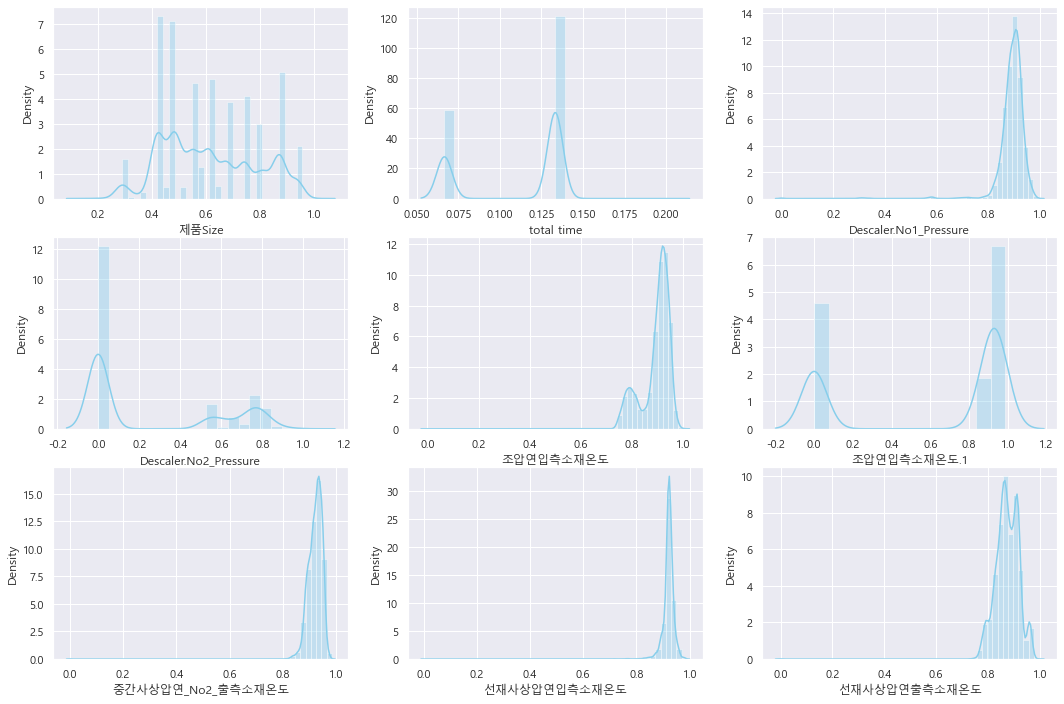

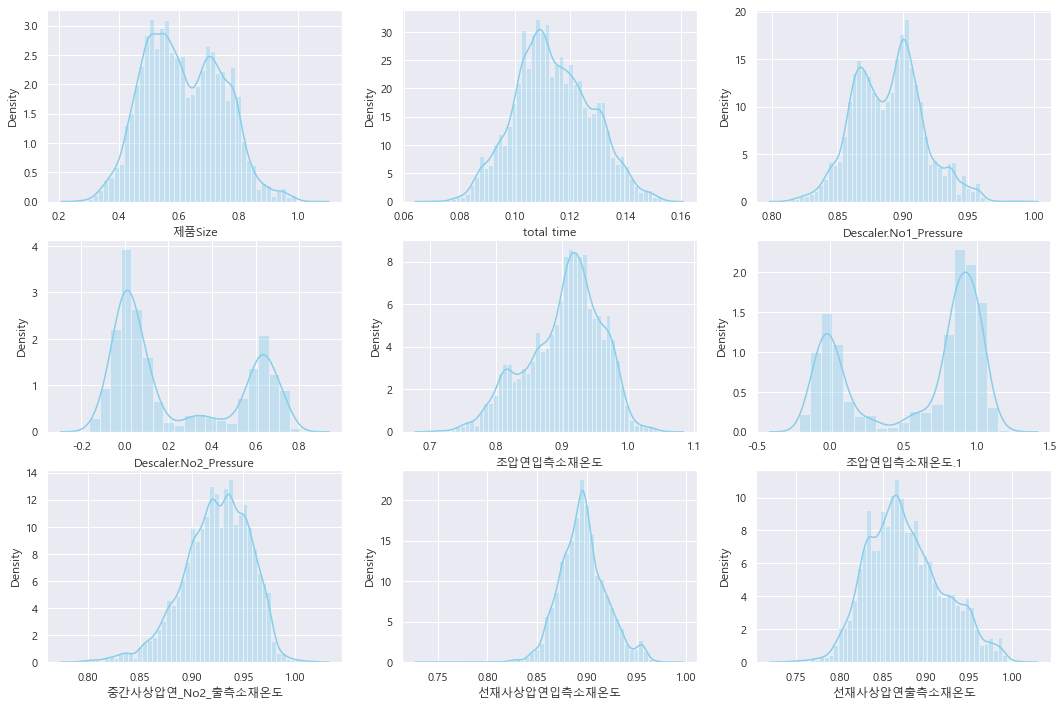

In [33]:
# E-IN

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view2_in['제품Size'], color = 'skyblue', ax= ax1) 
sns.distplot(view2_in['total time'], color = 'skyblue', ax= ax2) 
sns.distplot(view2_in['Descaler.No1_Pressure'], color = 'skyblue', ax= ax3) 
sns.distplot(view2_in['Descaler.No2_Pressure'], color = 'skyblue', ax=ax4)
sns.distplot(view2_in['조압연입측소재온도'], color = 'skyblue', ax=ax5) 
sns.distplot(view2_in['조압연입측소재온도.1'], color = 'skyblue', ax=ax6) 
sns.distplot(view2_in['중간사상압연_No2_출측소재온도'], color = 'skyblue', ax=ax7) 
sns.distplot(view2_in['선재사상압연입측소재온도'], color = 'skyblue', ax=ax8) 
sns.distplot(view2_in['선재사상압연출측소재온도'], color = 'skyblue', ax=ax9) 

# D-OUT

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view2_out['제품Size'], color = 'skyblue', ax= ax1) 
sns.distplot(view2_out['total time'], color = 'skyblue', ax= ax2) 
sns.distplot(view2_out['Descaler.No1_Pressure'], color = 'skyblue', ax= ax3) 
sns.distplot(view2_out['Descaler.No2_Pressure'], color = 'skyblue', ax=ax4)
sns.distplot(view2_out['조압연입측소재온도'], color = 'skyblue', ax=ax5) 
sns.distplot(view2_out['조압연입측소재온도.1'], color = 'skyblue', ax=ax6) 
sns.distplot(view2_out['중간사상압연_No2_출측소재온도'], color = 'skyblue', ax=ax7) 
sns.distplot(view2_out['선재사상압연입측소재온도'], color = 'skyblue', ax=ax8) 
sns.distplot(view2_out['선재사상압연출측소재온도'], color = 'skyblue', ax=ax9) 

<AxesSubplot:xlabel='최종압연 출측속도', ylabel='Density'>

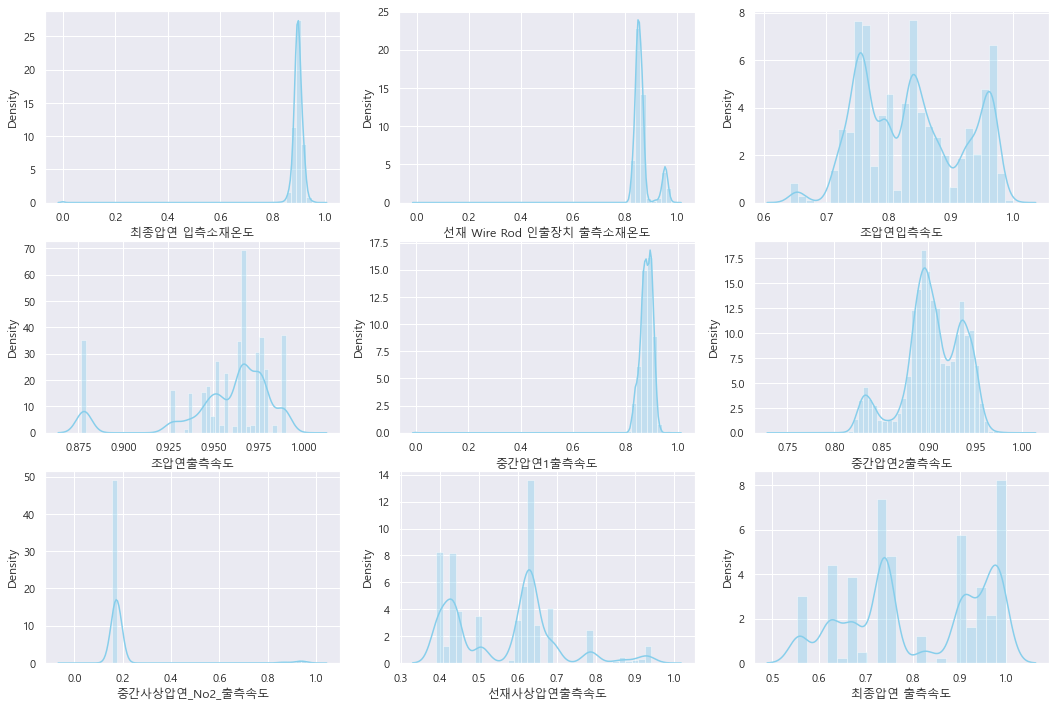

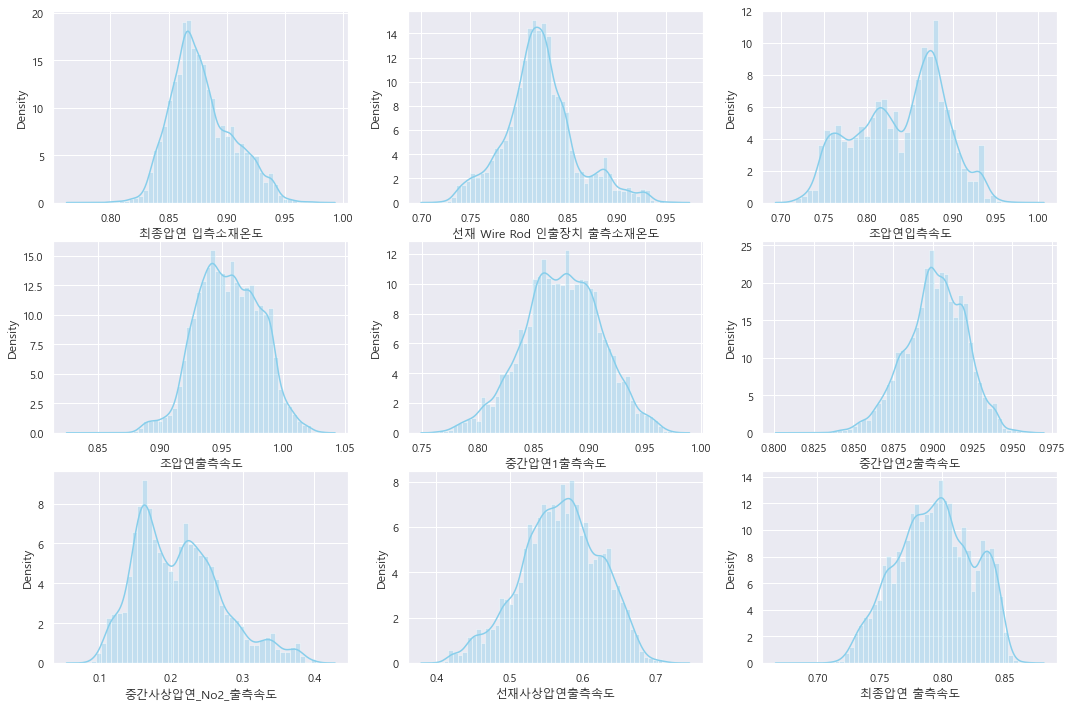

In [34]:
# E-IN

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view2_in['최종압연 입측소재온도'], color = 'skyblue', ax=ax1)
sns.distplot(view2_in['선재 Wire Rod 인출장치 출측소재온도'], color = 'skyblue', ax=ax2)
sns.distplot(view2_in['조압연입측속도'], color = 'skyblue', ax=ax3)
sns.distplot(view2_in['조압연출측속도'], color = 'skyblue', ax=ax4)
sns.distplot(view2_in['중간압연1출측속도'], color = 'skyblue', ax=ax5)
sns.distplot(view2_in['중간압연2출측속도'], color = 'skyblue', ax=ax6)
sns.distplot(view2_in['중간사상압연_No2_출측속도'], color = 'skyblue', ax=ax7)
sns.distplot(view2_in['선재사상압연출측속도'], color = 'skyblue', ax=ax8)
sns.distplot(view2_in['최종압연 출측속도'], color = 'skyblue', ax=ax9)

# D-OUT

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view2_out['최종압연 입측소재온도'], color = 'skyblue', ax=ax1)
sns.distplot(view2_out['선재 Wire Rod 인출장치 출측소재온도'], color = 'skyblue', ax=ax2)
sns.distplot(view2_out['조압연입측속도'], color = 'skyblue', ax=ax3)
sns.distplot(view2_out['조압연출측속도'], color = 'skyblue', ax=ax4)
sns.distplot(view2_out['중간압연1출측속도'], color = 'skyblue', ax=ax5)
sns.distplot(view2_out['중간압연2출측속도'], color = 'skyblue', ax=ax6)
sns.distplot(view2_out['중간사상압연_No2_출측속도'], color = 'skyblue', ax=ax7)
sns.distplot(view2_out['선재사상압연출측속도'], color = 'skyblue', ax=ax8)
sns.distplot(view2_out['최종압연 출측속도'], color = 'skyblue', ax=ax9)

<AxesSubplot:xlabel='Middle.Cooling Zone#2(2WB)압력', ylabel='Density'>

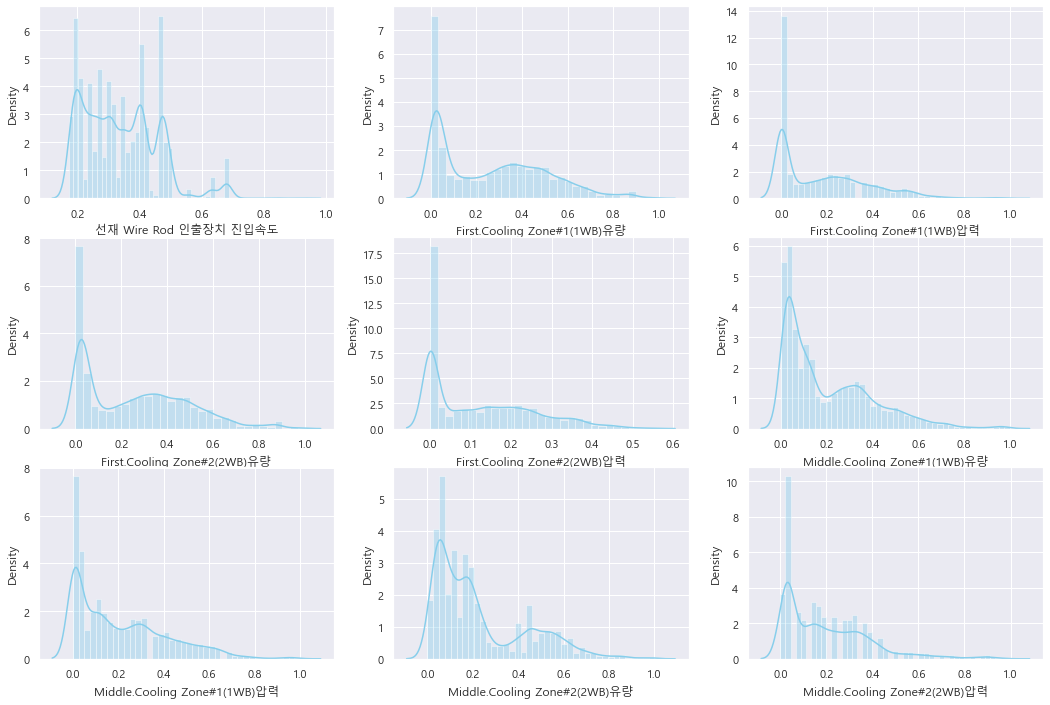

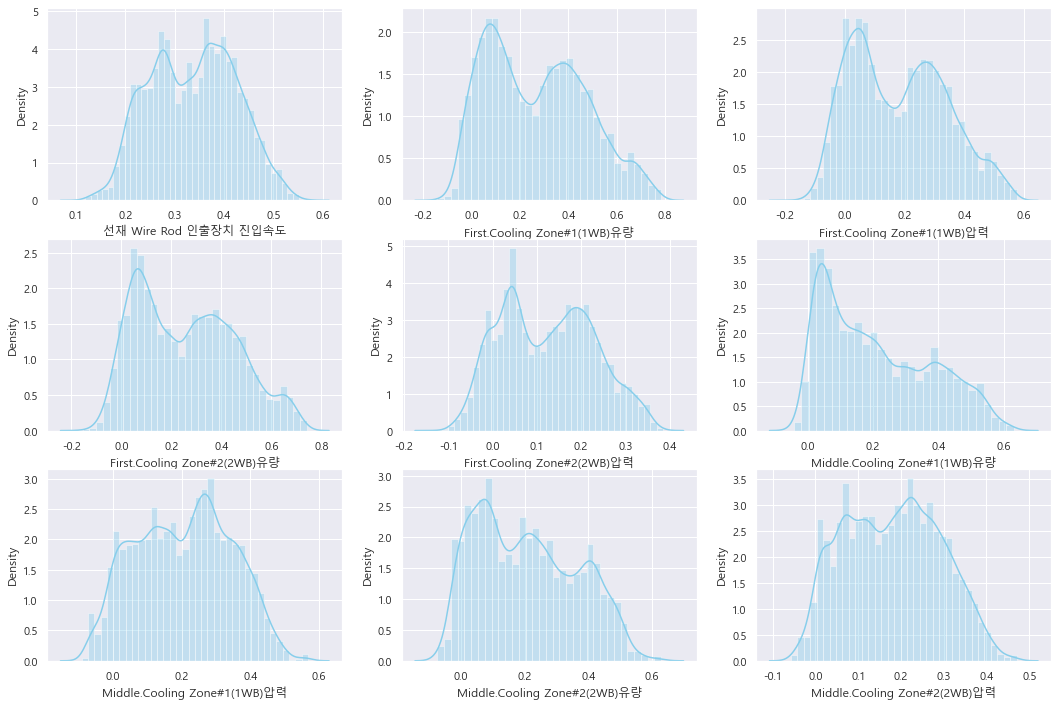

In [35]:
# E-IN

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view2_in['선재 Wire Rod 인출장치 진입속도'], color = 'skyblue', ax=ax1)
sns.distplot(view2_in['First.Cooling Zone#1(1WB)유량'], color = 'skyblue', ax=ax2)
sns.distplot(view2_in['First.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax3)
sns.distplot(view2_in['First.Cooling Zone#2(2WB)유량'], color = 'skyblue', ax=ax4)
sns.distplot(view2_in['First.Cooling Zone#2(2WB)압력'], color = 'skyblue', ax=ax5)
sns.distplot(view2_in['Middle.Cooling Zone#1(1WB)유량'], color = 'skyblue', ax=ax6)
sns.distplot(view2_in['Middle.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax7)
sns.distplot(view2_in['Middle.Cooling Zone#2(2WB)유량'], color = 'skyblue', ax=ax8)
sns.distplot(view2_in['Middle.Cooling Zone#2(2WB)압력'], color = 'skyblue', ax=ax9)

# D-OUT

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view2_out['선재 Wire Rod 인출장치 진입속도'], color = 'skyblue', ax=ax1)
sns.distplot(view2_out['First.Cooling Zone#1(1WB)유량'], color = 'skyblue', ax=ax2)
sns.distplot(view2_out['First.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax3)
sns.distplot(view2_out['First.Cooling Zone#2(2WB)유량'], color = 'skyblue', ax=ax4)
sns.distplot(view2_out['First.Cooling Zone#2(2WB)압력'], color = 'skyblue', ax=ax5)
sns.distplot(view2_out['Middle.Cooling Zone#1(1WB)유량'], color = 'skyblue', ax=ax6)
sns.distplot(view2_out['Middle.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax7)
sns.distplot(view2_out['Middle.Cooling Zone#2(2WB)유량'], color = 'skyblue', ax=ax8)
sns.distplot(view2_out['Middle.Cooling Zone#2(2WB)압력'], color = 'skyblue', ax=ax9)

<AxesSubplot:xlabel='선재사상압연모터전류', ylabel='Density'>

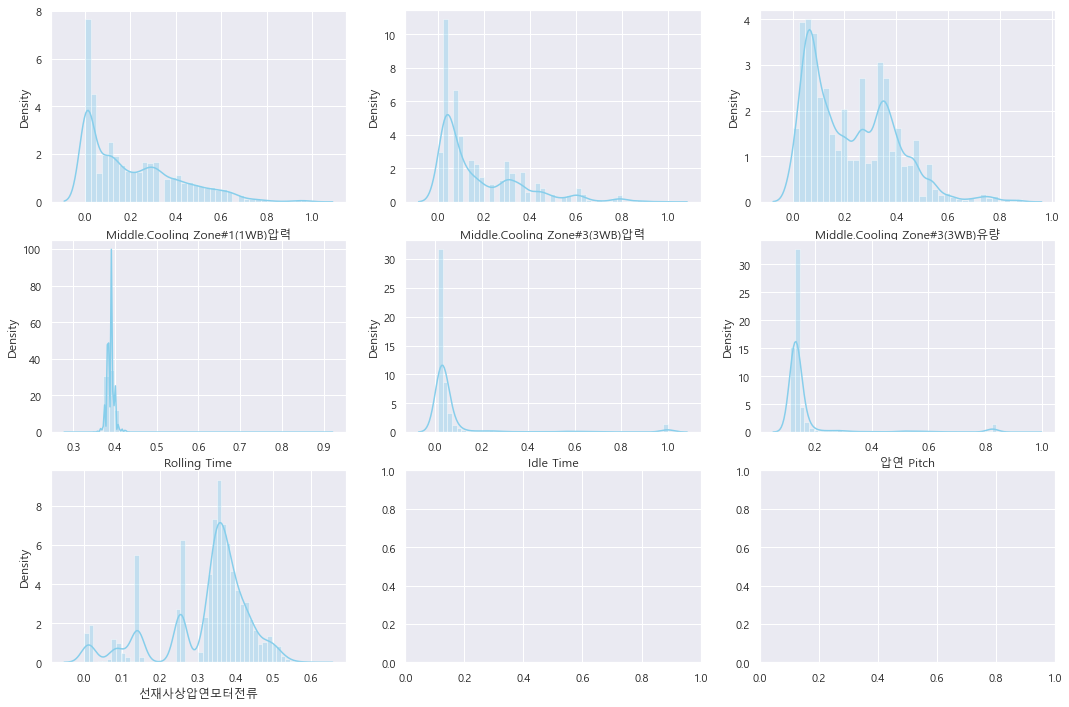

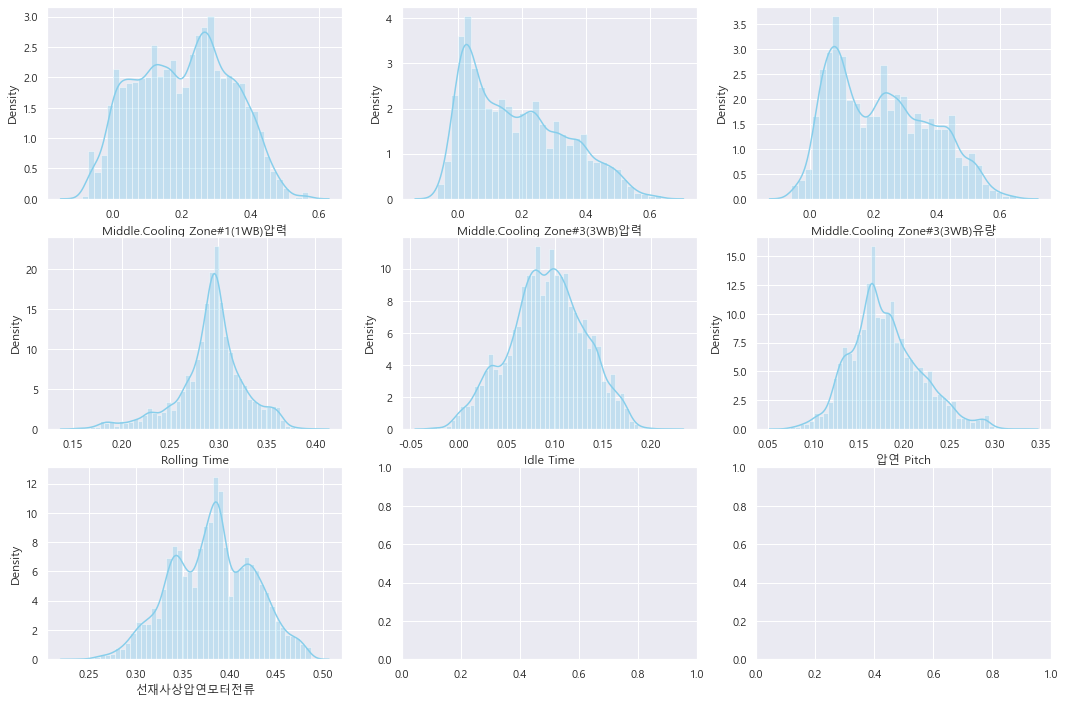

In [36]:
# E-IN

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view2_in['Middle.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax1)
sns.distplot(view2_in['Middle.Cooling Zone#3(3WB)압력'], color = 'skyblue', ax=ax2)
sns.distplot(view2_in['Middle.Cooling Zone#3(3WB)유량'], color = 'skyblue', ax=ax3)
sns.distplot(view2_in['Rolling Time'], color = 'skyblue', ax=ax4)
sns.distplot(view2_in['Idle Time'], color = 'skyblue', ax=ax5)
sns.distplot(view2_in['압연 Pitch'], color = 'skyblue', ax=ax6)
sns.distplot(view2_in['선재사상압연모터전류'], color = 'skyblue', ax=ax7)

# D-OUT

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view2_out['Middle.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax1)
sns.distplot(view2_out['Middle.Cooling Zone#3(3WB)압력'], color = 'skyblue', ax=ax2)
sns.distplot(view2_out['Middle.Cooling Zone#3(3WB)유량'], color = 'skyblue', ax=ax3)
sns.distplot(view2_out['Rolling Time'], color = 'skyblue', ax=ax4)
sns.distplot(view2_out['Idle Time'], color = 'skyblue', ax=ax5)
sns.distplot(view2_out['압연 Pitch'], color = 'skyblue', ax=ax6)
sns.distplot(view2_out['선재사상압연모터전류'], color = 'skyblue', ax=ax7)

In [37]:
k2_test_data_df # encode in put

,제품종류_Product_1,제품종류_Product_10,제품종류_Product_11,제품종류_Product_12,제품종류_Product_13,제품종류_Product_14,제품종류_Product_15,제품종류_Product_16,제품종류_Product_17,제품종류_Product_18,...,Middle.Cooling Zone#4(4WB)압력,Last.Cooling Zone#1(1WB)유량,Last.Cooling Zone#1(1WB)압력,Last.Cooling Zone#2(2WB)유량,Last.Cooling Zone#2(2WB)압력,Rolling Time,Idle Time,압연 Pitch,선재사상압연모터전류,k
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027027,0.476621,0.395349,0.599666,0.318182,0.383333,0.916667,0.764286,0.383486,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027027,0.181625,0.302326,0.225579,0.431818,0.383333,0.096667,0.178571,0.002921,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.270270,0.306163,0.139535,0.355936,0.113636,0.391667,0.026667,0.130952,0.348984,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.243243,0.649815,0.674419,0.835635,0.704545,0.391667,0.033333,0.135714,0.335072,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.270270,0.634208,0.627907,0.621239,0.363636,0.383333,0.030000,0.130952,0.369366,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027027,0.175060,0.232558,0.198540,0.295455,0.366667,0.026667,0.123810,0.444074,1.0
13148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.054054,0.493998,0.395349,0.654246,0.431818,0.391667,0.026667,0.130952,0.253548,1.0
13149,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027027,0.404505,0.232558,0.502733,0.295455,0.391667,0.026667,0.130952,0.456386,1.0
13150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.243243,0.352888,0.372093,0.464010,0.454545,0.400000,0.033333,0.138095,0.388147,1.0


In [38]:
decoded2_df # decode in put

,제품종류_Product_1,제품종류_Product_10,제품종류_Product_11,제품종류_Product_12,제품종류_Product_13,제품종류_Product_14,제품종류_Product_15,제품종류_Product_16,제품종류_Product_17,제품종류_Product_18,...,Middle.Cooling Zone#4(4WB)압력,Last.Cooling Zone#1(1WB)유량,Last.Cooling Zone#1(1WB)압력,Last.Cooling Zone#2(2WB)유량,Last.Cooling Zone#2(2WB)압력,Rolling Time,Idle Time,압연 Pitch,선재사상압연모터전류,k
0,0.104298,0.018285,-0.002820,-0.031331,0.001308,0.001279,0.171087,-0.002642,0.007046,0.026315,...,0.147470,0.437551,0.275177,0.522180,0.327804,0.343353,0.132508,0.218608,0.347137,0.978091
1,-0.022019,-0.009217,0.021055,0.036103,0.025232,0.077713,-0.057876,-0.032287,-0.052644,-0.019739,...,-0.033338,0.267863,0.396774,0.420392,0.344960,0.154677,0.042776,0.083791,0.393397,0.999764
2,0.024804,0.000078,-0.002217,-0.006761,-0.000786,0.003882,0.059791,0.015900,-0.032146,0.031053,...,0.226844,0.330301,0.211356,0.393597,0.194063,0.286808,0.069833,0.163787,0.430198,0.985680
3,0.091627,0.013127,-0.009505,0.010774,-0.000111,0.019721,0.087123,0.007411,-0.064370,0.006030,...,0.187118,0.621221,0.526531,0.777291,0.567264,0.293642,0.047016,0.162593,0.380046,0.977948
4,0.034857,-0.004710,0.003230,0.006407,-0.006991,-0.001869,0.032754,-0.005917,-0.026658,0.026579,...,0.207934,0.482744,0.365811,0.556576,0.331657,0.280535,0.054266,0.159036,0.435254,0.999777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13147,-0.001766,-0.008628,-0.008864,0.009144,-0.015941,-0.025379,0.038761,-0.011443,0.025940,0.048429,...,0.025827,0.133789,0.139188,0.124469,0.126329,0.292284,0.112527,0.200750,0.418382,1.037351
13148,0.163067,-0.002494,-0.002413,-0.000689,0.008517,-0.000166,-0.020809,0.001477,-0.032906,0.025946,...,0.083202,0.546573,0.465128,0.632932,0.444271,0.330012,0.173153,0.253773,0.326345,1.065659
13149,0.117151,0.007583,-0.006320,-0.012210,0.013966,0.023294,-0.003586,0.008642,0.015790,0.001661,...,0.078744,0.360733,0.294806,0.435887,0.303861,0.307382,0.138653,0.215458,0.330448,0.986061
13150,0.043774,0.003062,-0.005009,-0.021957,0.008118,0.002128,0.135269,-0.015225,-0.029550,-0.004069,...,0.162165,0.401027,0.245065,0.477568,0.233720,0.318617,0.105128,0.178891,0.434100,1.004175


In [39]:
result2 = k2_test_data_df-decoded2_df
result2

,제품종류_Product_1,제품종류_Product_10,제품종류_Product_11,제품종류_Product_12,제품종류_Product_13,제품종류_Product_14,제품종류_Product_15,제품종류_Product_16,제품종류_Product_17,제품종류_Product_18,...,Middle.Cooling Zone#4(4WB)압력,Last.Cooling Zone#1(1WB)유량,Last.Cooling Zone#1(1WB)압력,Last.Cooling Zone#2(2WB)유량,Last.Cooling Zone#2(2WB)압력,Rolling Time,Idle Time,압연 Pitch,선재사상압연모터전류,k
0,-0.104298,-0.018285,0.002820,0.031331,-0.001308,-0.001279,-0.171087,0.002642,-0.007046,-0.026315,...,-0.120443,0.039070,0.120172,0.077486,-0.009622,0.039981,0.784159,0.545678,0.036349,0.021909
1,0.022019,0.009217,-0.021055,-0.036103,-0.025232,-0.077713,0.057876,0.032287,0.052644,0.019739,...,0.060365,-0.086238,-0.094449,-0.194813,0.086858,0.228657,0.053891,0.094781,-0.390476,0.000236
2,-0.024804,-0.000078,0.002217,0.006761,0.000786,-0.003882,-0.059791,-0.015900,0.032146,-0.031053,...,0.043426,-0.024138,-0.071821,-0.037661,-0.080427,0.104858,-0.043166,-0.032835,-0.081213,0.014320
3,-0.091627,-0.013127,0.009505,-0.010774,0.000111,-0.019721,-0.087123,-0.007411,0.064370,-0.006030,...,0.056125,0.028594,0.147888,0.058344,0.137281,0.098025,-0.013683,-0.026878,-0.044974,0.022052
4,-0.034857,0.004710,-0.003230,-0.006407,0.006991,0.001869,-0.032754,0.005917,0.026658,-0.026579,...,0.062336,0.151464,0.262096,0.064663,0.031980,0.102798,-0.024266,-0.028084,-0.065889,0.000223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13147,0.001766,0.008628,0.008864,-0.009144,0.015941,0.025379,-0.038761,0.011443,-0.025940,-0.048429,...,0.001200,0.041271,0.093370,0.074070,0.169126,0.074383,-0.085860,-0.076941,0.025691,-0.037351
13148,-0.163067,0.002494,0.002413,0.000689,-0.008517,0.000166,0.020809,-0.001477,0.032906,-0.025946,...,-0.029148,-0.052574,-0.069779,0.021314,-0.012453,0.061654,-0.146486,-0.122821,-0.072797,-0.065659
13149,0.882849,-0.007583,0.006320,0.012210,-0.013966,-0.023294,0.003586,-0.008642,-0.015790,-0.001661,...,-0.051717,0.043772,-0.062248,0.066846,-0.008407,0.084285,-0.111986,-0.084506,0.125938,0.013939
13150,-0.043774,-0.003062,0.005009,0.021957,-0.008118,-0.002128,-0.135269,0.015225,0.029550,0.004069,...,0.081079,-0.048139,0.127028,-0.013558,0.220825,0.081383,-0.071795,-0.040796,-0.045953,-0.004175


# 3번 오토인코더

In [40]:
#################### Autoencoder NO.2 encoded output ##########################

extract_encoded_data3 = K.function(inputs = Autoencoder3.layers[0].input, 
                                  outputs = Autoencoder3.layers[8].output) # out put 레이어

# extract encoded dataframe
decoded3 = extract_encoded_data3(k3_test_data)

decoded3_df = pd.DataFrame(decoded3)
decoded3_df.columns = col_name

k3_test_data_df = pd.DataFrame(k3_test_data)
k3_test_data_df.columns = col_name

# 제품종류와 KMeans 컬럼 제외
view3_in = k3_test_data_df.iloc[:, 48:87]
view3_out = decoded3_df.iloc[:, 48:87]

<AxesSubplot:xlabel='선재사상압연출측소재온도', ylabel='Density'>

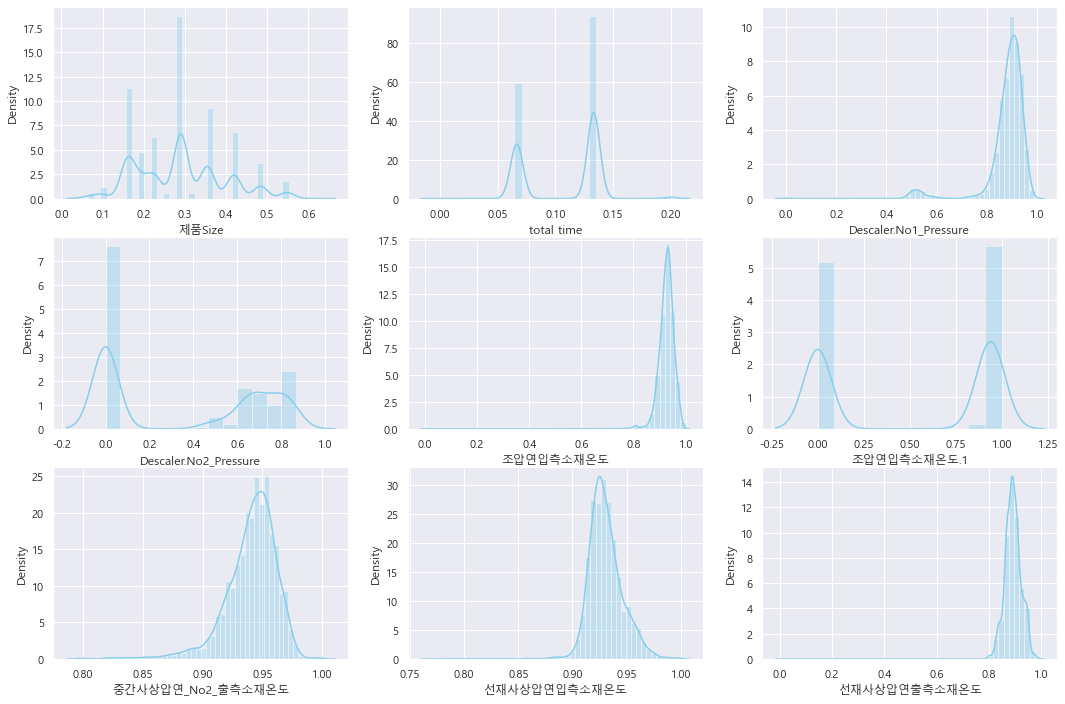

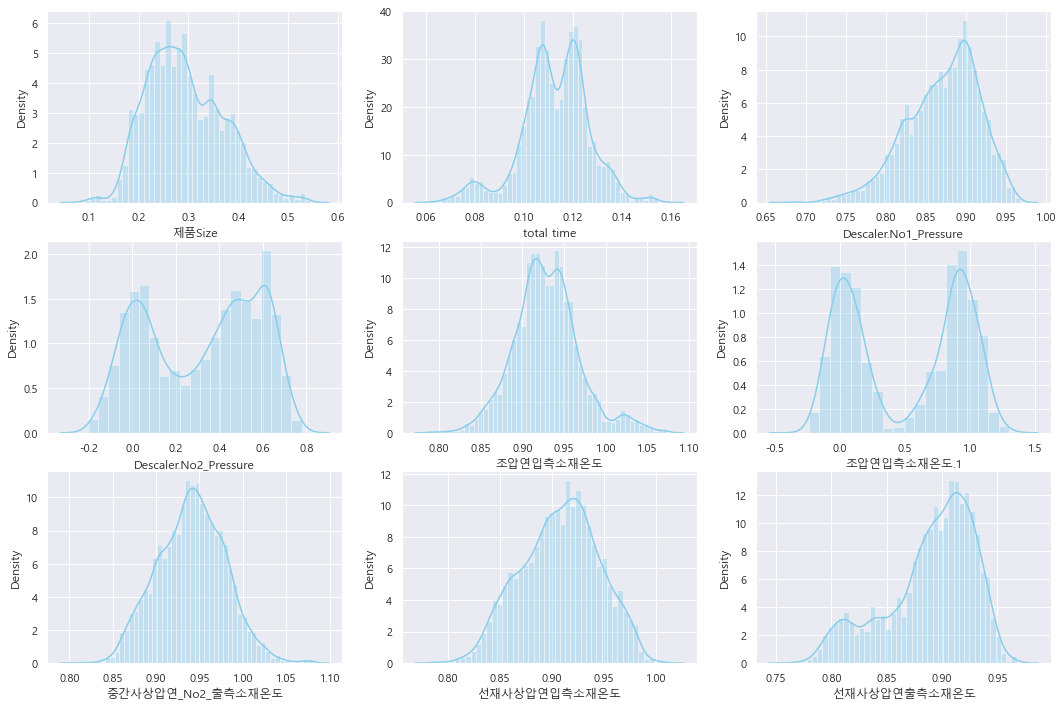

In [41]:
# E-IN

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view3_in['제품Size'], color = 'skyblue', ax= ax1) 
sns.distplot(view3_in['total time'], color = 'skyblue', ax= ax2) 
sns.distplot(view3_in['Descaler.No1_Pressure'], color = 'skyblue', ax= ax3) 
sns.distplot(view3_in['Descaler.No2_Pressure'], color = 'skyblue', ax=ax4)
sns.distplot(view3_in['조압연입측소재온도'], color = 'skyblue', ax=ax5) 
sns.distplot(view3_in['조압연입측소재온도.1'], color = 'skyblue', ax=ax6) 
sns.distplot(view3_in['중간사상압연_No2_출측소재온도'], color = 'skyblue', ax=ax7) 
sns.distplot(view3_in['선재사상압연입측소재온도'], color = 'skyblue', ax=ax8) 
sns.distplot(view3_in['선재사상압연출측소재온도'], color = 'skyblue', ax=ax9) 

# D-OUT

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view3_out['제품Size'], color = 'skyblue', ax= ax1) 
sns.distplot(view3_out['total time'], color = 'skyblue', ax= ax2) 
sns.distplot(view3_out['Descaler.No1_Pressure'], color = 'skyblue', ax= ax3) 
sns.distplot(view3_out['Descaler.No2_Pressure'], color = 'skyblue', ax=ax4)
sns.distplot(view3_out['조압연입측소재온도'], color = 'skyblue', ax=ax5) 
sns.distplot(view3_out['조압연입측소재온도.1'], color = 'skyblue', ax=ax6) 
sns.distplot(view3_out['중간사상압연_No2_출측소재온도'], color = 'skyblue', ax=ax7) 
sns.distplot(view3_out['선재사상압연입측소재온도'], color = 'skyblue', ax=ax8) 
sns.distplot(view3_out['선재사상압연출측소재온도'], color = 'skyblue', ax=ax9) 

<AxesSubplot:xlabel='최종압연 출측속도', ylabel='Density'>

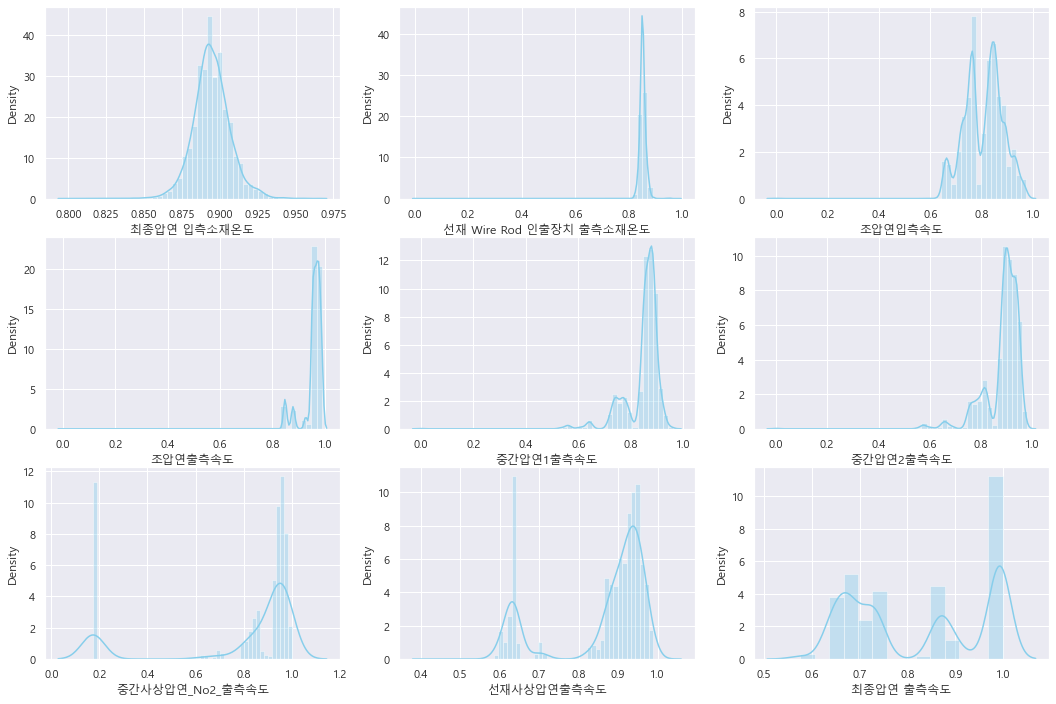

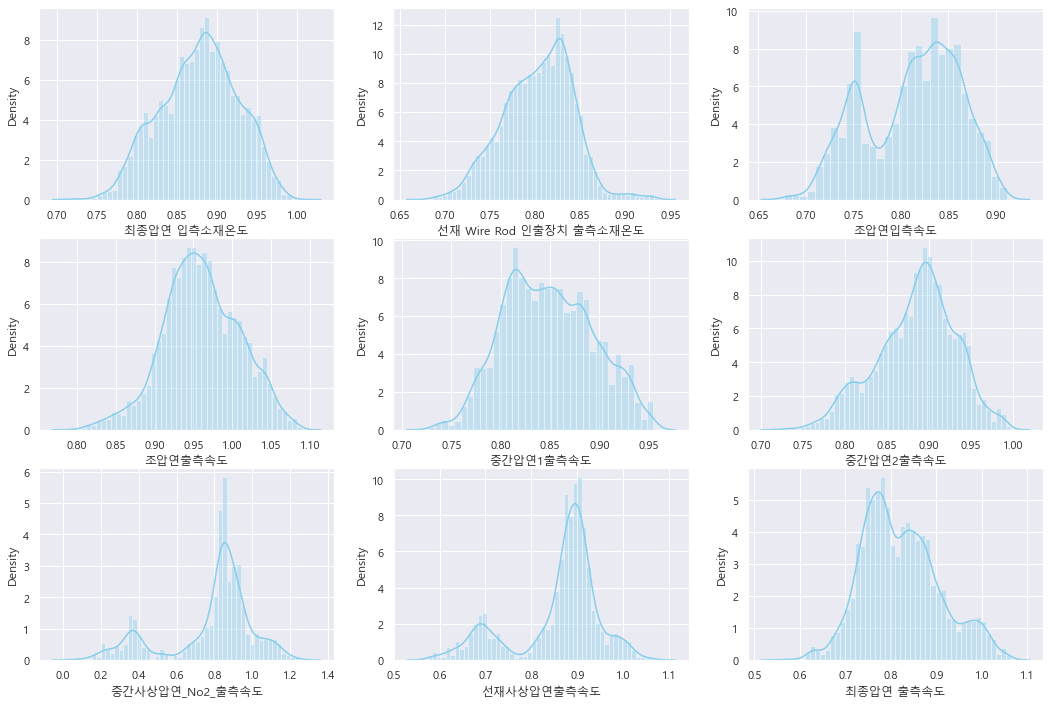

In [42]:
# D-IN

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view3_in['최종압연 입측소재온도'], color = 'skyblue', ax=ax1)
sns.distplot(view3_in['선재 Wire Rod 인출장치 출측소재온도'], color = 'skyblue', ax=ax2)
sns.distplot(view3_in['조압연입측속도'], color = 'skyblue', ax=ax3)
sns.distplot(view3_in['조압연출측속도'], color = 'skyblue', ax=ax4)
sns.distplot(view3_in['중간압연1출측속도'], color = 'skyblue', ax=ax5)
sns.distplot(view3_in['중간압연2출측속도'], color = 'skyblue', ax=ax6)
sns.distplot(view3_in['중간사상압연_No2_출측속도'], color = 'skyblue', ax=ax7)
sns.distplot(view3_in['선재사상압연출측속도'], color = 'skyblue', ax=ax8)
sns.distplot(view3_in['최종압연 출측속도'], color = 'skyblue', ax=ax9)

# E-OUT

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view3_out['최종압연 입측소재온도'], color = 'skyblue', ax=ax1)
sns.distplot(view3_out['선재 Wire Rod 인출장치 출측소재온도'], color = 'skyblue', ax=ax2)
sns.distplot(view3_out['조압연입측속도'], color = 'skyblue', ax=ax3)
sns.distplot(view3_out['조압연출측속도'], color = 'skyblue', ax=ax4)
sns.distplot(view3_out['중간압연1출측속도'], color = 'skyblue', ax=ax5)
sns.distplot(view3_out['중간압연2출측속도'], color = 'skyblue', ax=ax6)
sns.distplot(view3_out['중간사상압연_No2_출측속도'], color = 'skyblue', ax=ax7)
sns.distplot(view3_out['선재사상압연출측속도'], color = 'skyblue', ax=ax8)
sns.distplot(view3_out['최종압연 출측속도'], color = 'skyblue', ax=ax9)

<AxesSubplot:xlabel='Middle.Cooling Zone#2(2WB)압력', ylabel='Density'>

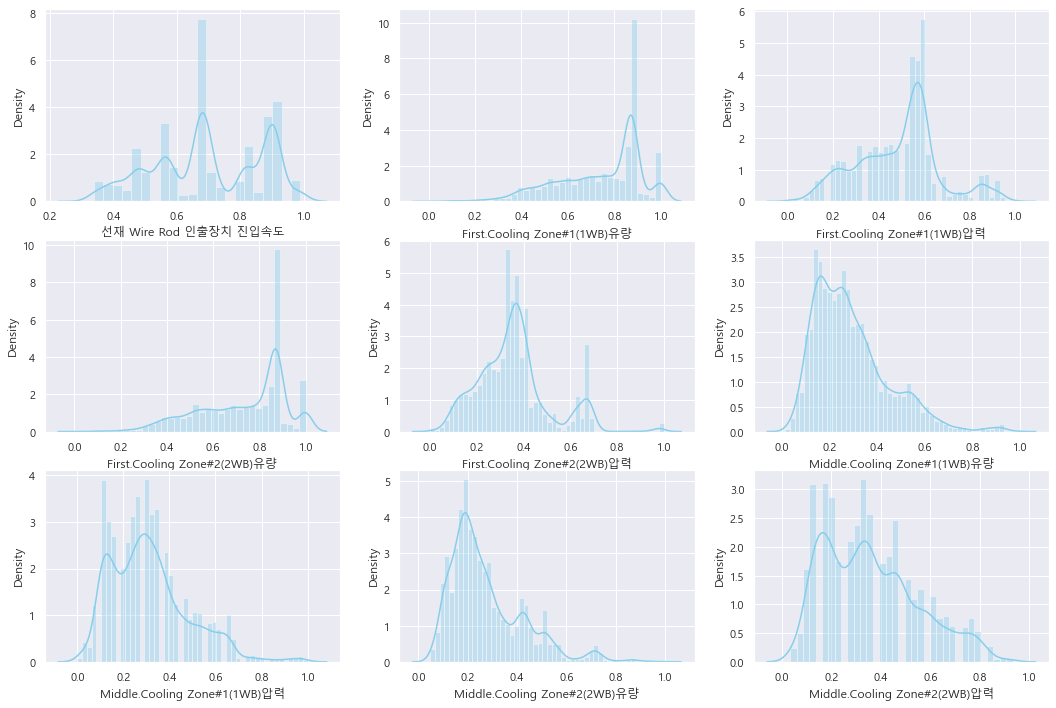

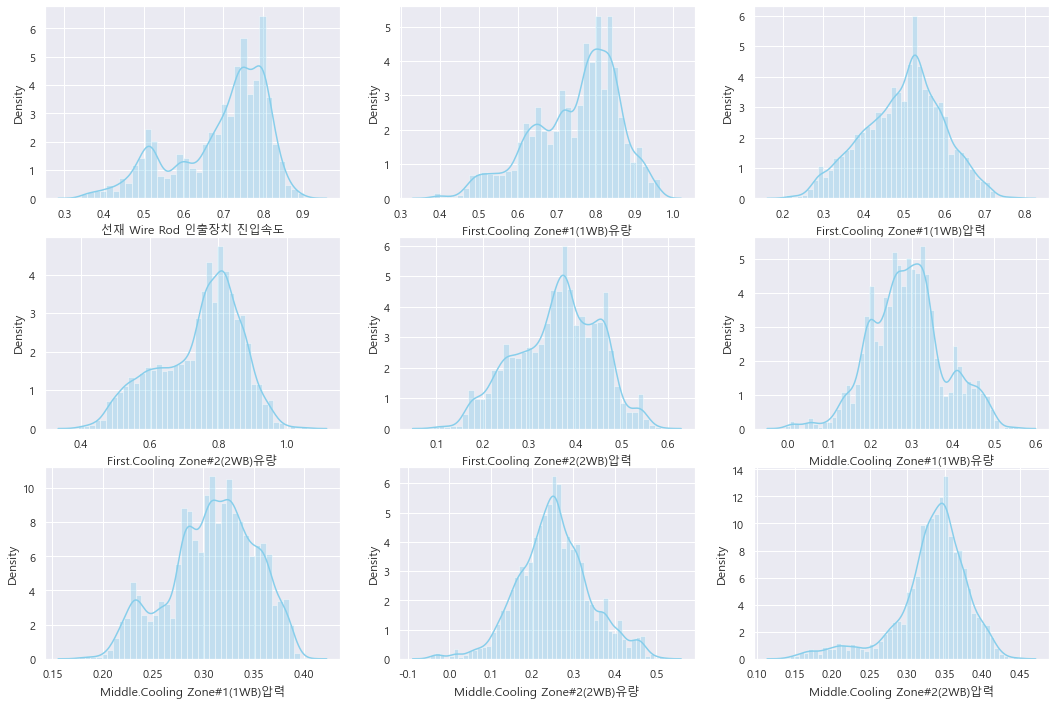

In [43]:
# E-IN

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view3_in['선재 Wire Rod 인출장치 진입속도'], color = 'skyblue', ax=ax1)
sns.distplot(view3_in['First.Cooling Zone#1(1WB)유량'], color = 'skyblue', ax=ax2)
sns.distplot(view3_in['First.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax3)
sns.distplot(view3_in['First.Cooling Zone#2(2WB)유량'], color = 'skyblue', ax=ax4)
sns.distplot(view3_in['First.Cooling Zone#2(2WB)압력'], color = 'skyblue', ax=ax5)
sns.distplot(view3_in['Middle.Cooling Zone#1(1WB)유량'], color = 'skyblue', ax=ax6)
sns.distplot(view3_in['Middle.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax7)
sns.distplot(view3_in['Middle.Cooling Zone#2(2WB)유량'], color = 'skyblue', ax=ax8)
sns.distplot(view3_in['Middle.Cooling Zone#2(2WB)압력'], color = 'skyblue', ax=ax9)

# D-OUT

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view3_out['선재 Wire Rod 인출장치 진입속도'], color = 'skyblue', ax=ax1)
sns.distplot(view3_out['First.Cooling Zone#1(1WB)유량'], color = 'skyblue', ax=ax2)
sns.distplot(view3_out['First.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax3)
sns.distplot(view3_out['First.Cooling Zone#2(2WB)유량'], color = 'skyblue', ax=ax4)
sns.distplot(view3_out['First.Cooling Zone#2(2WB)압력'], color = 'skyblue', ax=ax5)
sns.distplot(view3_out['Middle.Cooling Zone#1(1WB)유량'], color = 'skyblue', ax=ax6)
sns.distplot(view3_out['Middle.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax7)
sns.distplot(view3_out['Middle.Cooling Zone#2(2WB)유량'], color = 'skyblue', ax=ax8)
sns.distplot(view3_out['Middle.Cooling Zone#2(2WB)압력'], color = 'skyblue', ax=ax9)

<AxesSubplot:xlabel='선재사상압연모터전류', ylabel='Density'>

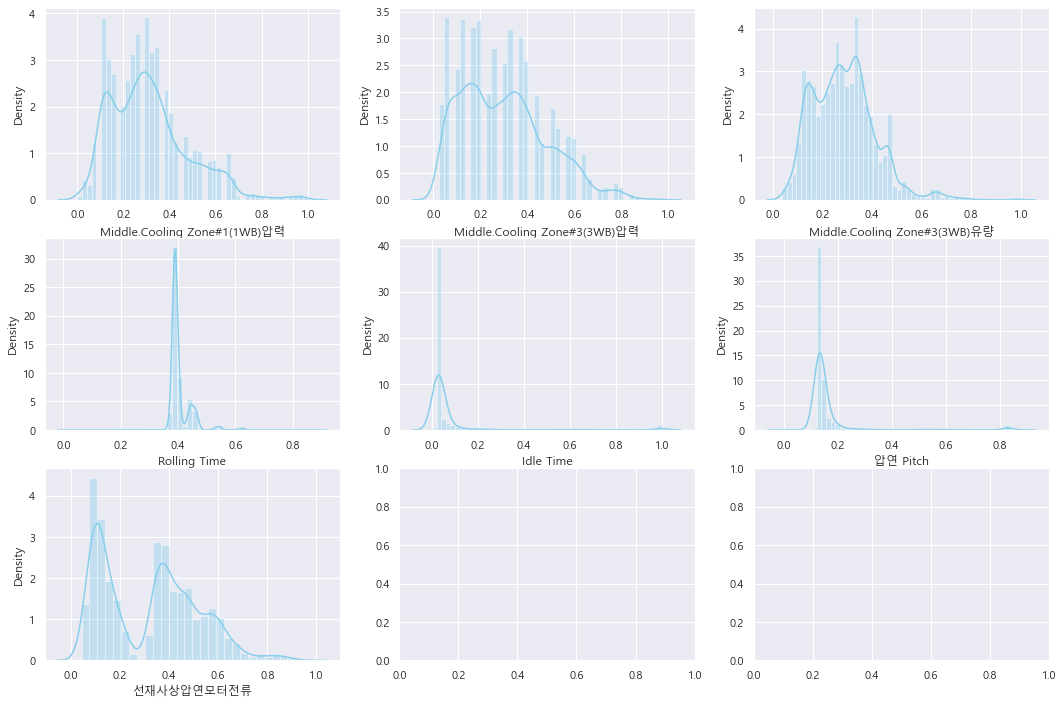

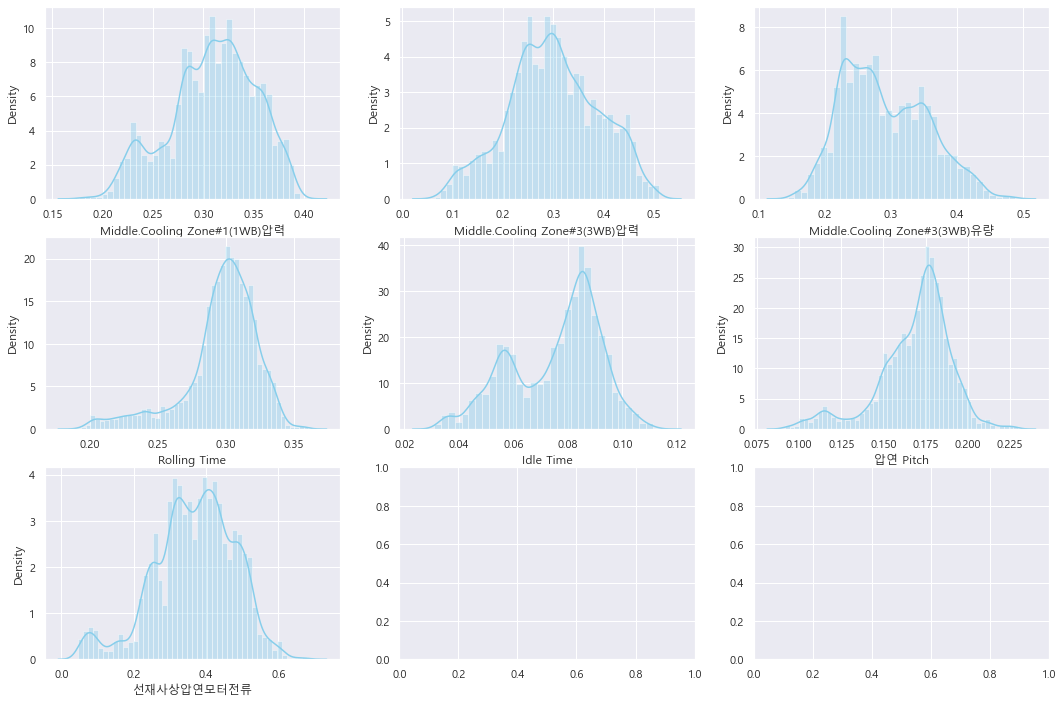

In [44]:
# E-IN

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view3_in['Middle.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax1)
sns.distplot(view3_in['Middle.Cooling Zone#3(3WB)압력'], color = 'skyblue', ax=ax2)
sns.distplot(view3_in['Middle.Cooling Zone#3(3WB)유량'], color = 'skyblue', ax=ax3)
sns.distplot(view3_in['Rolling Time'], color = 'skyblue', ax=ax4)
sns.distplot(view3_in['Idle Time'], color = 'skyblue', ax=ax5)
sns.distplot(view3_in['압연 Pitch'], color = 'skyblue', ax=ax6)
sns.distplot(view3_in['선재사상압연모터전류'], color = 'skyblue', ax=ax7)

# D-OUT

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows = 3, ncols =3 )
figure.set_size_inches(18,12) 

sns.distplot(view3_out['Middle.Cooling Zone#1(1WB)압력'], color = 'skyblue', ax=ax1)
sns.distplot(view3_out['Middle.Cooling Zone#3(3WB)압력'], color = 'skyblue', ax=ax2)
sns.distplot(view3_out['Middle.Cooling Zone#3(3WB)유량'], color = 'skyblue', ax=ax3)
sns.distplot(view3_out['Rolling Time'], color = 'skyblue', ax=ax4)
sns.distplot(view3_out['Idle Time'], color = 'skyblue', ax=ax5)
sns.distplot(view3_out['압연 Pitch'], color = 'skyblue', ax=ax6)
sns.distplot(view3_out['선재사상압연모터전류'], color = 'skyblue', ax=ax7)

In [45]:
k3_test_data_df # encode in put

,제품종류_Product_1,제품종류_Product_10,제품종류_Product_11,제품종류_Product_12,제품종류_Product_13,제품종류_Product_14,제품종류_Product_15,제품종류_Product_16,제품종류_Product_17,제품종류_Product_18,...,Middle.Cooling Zone#4(4WB)압력,Last.Cooling Zone#1(1WB)유량,Last.Cooling Zone#1(1WB)압력,Last.Cooling Zone#2(2WB)유량,Last.Cooling Zone#2(2WB)압력,Rolling Time,Idle Time,압연 Pitch,선재사상압연모터전류,k
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.027027,0.500563,0.441860,0.666806,0.409091,0.391667,0.030000,0.133333,0.345367,2.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027027,0.537345,0.534884,0.773920,0.750000,0.391667,0.023333,0.128571,0.396077,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.243243,0.471858,0.488372,0.620613,0.613636,0.466667,0.020000,0.147619,0.555440,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.189189,0.516396,0.465116,0.682495,0.795455,0.450000,0.030000,0.150000,0.459516,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.027027,0.528946,0.279070,0.668308,0.750000,0.408333,0.030000,0.138095,0.094741,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.405405,0.323572,0.186047,0.406468,0.204545,0.391667,0.026667,0.130952,0.377295,2.0
8756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.405405,0.462977,0.465116,0.388900,0.454545,0.383333,0.023333,0.126190,0.062187,2.0
8757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.054054,0.494256,0.372093,0.652410,0.477273,0.366667,0.030000,0.126190,0.394268,2.0
8758,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.378378,0.473596,0.511628,0.541415,0.454545,0.383333,0.033333,0.133333,0.107123,2.0


In [46]:
decoded3_df # decode in put

,제품종류_Product_1,제품종류_Product_10,제품종류_Product_11,제품종류_Product_12,제품종류_Product_13,제품종류_Product_14,제품종류_Product_15,제품종류_Product_16,제품종류_Product_17,제품종류_Product_18,...,Middle.Cooling Zone#4(4WB)압력,Last.Cooling Zone#1(1WB)유량,Last.Cooling Zone#1(1WB)압력,Last.Cooling Zone#2(2WB)유량,Last.Cooling Zone#2(2WB)압력,Rolling Time,Idle Time,압연 Pitch,선재사상압연모터전류,k
0,0.001447,0.031254,-0.015019,-0.014999,-0.026044,0.018098,-0.033304,-0.006183,0.992893,-0.065489,...,0.065946,0.526989,0.434148,0.581965,0.510485,0.280833,0.046910,0.152656,0.311240,1.856501
1,0.112453,0.008219,0.010415,0.014355,0.018602,-0.005367,0.143163,0.003150,0.034179,0.073700,...,0.182681,0.574272,0.577169,0.696573,0.607641,0.285889,0.047977,0.163869,0.317925,2.027722
2,0.005716,0.006282,-0.000570,-0.008418,0.008063,0.005115,0.087400,0.002895,0.017586,0.057671,...,0.341462,0.403613,0.405423,0.498996,0.444500,0.294227,0.078322,0.183309,0.469182,1.959883
3,-0.003605,-0.003836,0.002605,0.000933,-0.005521,-0.002823,0.026043,-0.001180,1.069067,0.028374,...,0.162746,0.438311,0.356340,0.534844,0.452189,0.296822,0.086985,0.178115,0.429643,1.970624
4,-0.022198,-0.008365,0.012536,-0.004078,0.015432,-0.003013,0.078752,0.008509,1.058884,-0.031955,...,0.122642,0.481617,0.420275,0.545258,0.503163,0.289857,0.089000,0.176116,0.300035,2.033018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.021238,-0.004430,-0.025960,-0.007351,-0.028175,0.033648,0.730892,-0.001457,-0.046522,0.051478,...,0.087626,0.502515,0.352669,0.578162,0.438664,0.201574,0.036025,0.103505,0.437282,1.770508
8756,0.001456,-0.007038,-0.001904,0.009000,0.014194,-0.009805,0.036918,0.001269,0.946940,-0.022185,...,0.111263,0.492346,0.408477,0.555457,0.488553,0.307746,0.086489,0.176489,0.342591,2.098017
8757,0.067901,0.027542,0.003379,-0.020458,-0.005380,0.005111,0.040658,0.007529,-0.000716,0.011894,...,0.157385,0.527856,0.496681,0.624985,0.544905,0.273635,0.059762,0.163470,0.306729,1.932407
8758,0.026435,-0.008722,-0.009665,0.011923,0.008971,0.012737,0.749218,-0.008940,-0.007065,0.125438,...,0.282830,0.444516,0.478276,0.566872,0.484427,0.235855,0.062762,0.101528,0.335902,1.960196


In [47]:
result3 = k3_test_data_df-decoded3_df
result3

,제품종류_Product_1,제품종류_Product_10,제품종류_Product_11,제품종류_Product_12,제품종류_Product_13,제품종류_Product_14,제품종류_Product_15,제품종류_Product_16,제품종류_Product_17,제품종류_Product_18,...,Middle.Cooling Zone#4(4WB)압력,Last.Cooling Zone#1(1WB)유량,Last.Cooling Zone#1(1WB)압력,Last.Cooling Zone#2(2WB)유량,Last.Cooling Zone#2(2WB)압력,Rolling Time,Idle Time,압연 Pitch,선재사상압연모터전류,k
0,-0.001447,-0.031254,0.015019,0.014999,0.026044,-0.018098,0.033304,0.006183,0.007107,0.065489,...,-0.038919,-0.026426,0.007712,0.084841,-0.101394,0.110833,-0.016910,-0.019322,0.034127,0.143499
1,0.887547,-0.008219,-0.010415,-0.014355,-0.018602,0.005367,-0.143163,-0.003150,-0.034179,-0.073700,...,-0.155654,-0.036927,-0.042285,0.077347,0.142359,0.105778,-0.024644,-0.035297,0.078152,-0.027722
2,-0.005716,-0.006282,0.000570,0.008418,-0.008063,-0.005115,-0.087400,-0.002895,-0.017586,-0.057671,...,-0.098219,0.068245,0.082949,0.121618,0.169136,0.172440,-0.058322,-0.035690,0.086258,0.040117
3,0.003605,0.003836,-0.002605,-0.000933,0.005521,0.002823,-0.026043,0.001180,-0.069067,-0.028374,...,0.026443,0.078085,0.108776,0.147651,0.343266,0.153178,-0.056985,-0.028115,0.029873,0.029376
4,0.022198,0.008365,-0.012536,0.004078,-0.015432,0.003013,-0.078752,-0.008509,-0.058884,0.031955,...,-0.095615,0.047329,-0.141205,0.123050,0.246837,0.118476,-0.059000,-0.038021,-0.205294,-0.033018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-0.021238,0.004430,0.025960,0.007351,0.028175,-0.033648,0.269108,0.001457,0.046522,-0.051478,...,0.317779,-0.178943,-0.166622,-0.171694,-0.234118,0.190093,-0.009358,0.027447,-0.059986,0.229492
8756,-0.001456,0.007038,0.001904,-0.009000,-0.014194,0.009805,-0.036918,-0.001269,0.053060,0.022185,...,0.294142,-0.029369,0.056640,-0.166556,-0.034007,0.075588,-0.063156,-0.050299,-0.280404,-0.098017
8757,-0.067901,-0.027542,-0.003379,0.020458,0.005380,-0.005111,-0.040658,-0.007529,0.000716,-0.011894,...,-0.103331,-0.033600,-0.124588,0.027425,-0.067632,0.093031,-0.029762,-0.037279,0.087540,0.067593
8758,-0.026435,0.008722,0.009665,-0.011923,-0.008971,-0.012737,0.250782,0.008940,0.007065,-0.125438,...,0.095548,0.029080,0.033352,-0.025458,-0.029882,0.147479,-0.029429,0.031805,-0.228779,0.039804
